# Research Question 1: River extent of influence

What is the spatial extent of influence of the river contribution to surface waters in the CAA?
- Does the RCD span full straits in the CAA? If so, which and during all seasons or only for a portion of the year?
- How long does it take for river contributions in the central CAA to reach Baffin Bay?

In [1]:
import os
os.environ['PROJ_LIB'] = '/home/brogalla/anaconda3/share/proj'

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import netCDF4 as nc
from itertools import compress
import datetime as dt
import matplotlib.dates as mdates

%matplotlib inline

### Set region:

In [3]:
imin, imax = 1480, 2050
jmin, jmax = 160, 800

##### Load domain dimensions for reference:

In [4]:
mask  = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask = np.array(mask.variables['tmask'])
cond = (tmask[0,:,:,:] > 0.1) 
land_mask = np.ma.masked_where(cond, tmask[0,:,:,:])

mesh  = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12-EXH006_5d_gridT_y2002m01d05.nc')
lons  = np.array(mesh.variables['nav_lon'])
lats  = np.array(mesh.variables['nav_lat'])
tmask = tmask[0,:,imin:imax,jmin:jmax]

In [5]:
ref   = nc.Dataset('/data/brogalla/run_storage/trial4/ref-2003/ANHA12_EXH006_2003_monthly.nc',  'r')
tlons = np.array(ref.variables['nav_lon'])
tlats = np.array(ref.variables['nav_lat'])
depth = np.array(ref.variables['deptht'])

##### Load boundary coordinates:

In [6]:
x1=imin
y1=jmin

l1i = 2013-x1; l1j = np.arange(300-y1,392-y1)
l2i = 1935-x1; l2j = np.arange(450-y1,530-y1)
l3i = np.arange(1850-x1,1885-x1); l3j = 555-y1
l4i = np.arange(1753-x1,1837-x1); l4j = 568-y1
l5i = np.arange(1720-x1,1790-x1); l5j = 605-y1
l6i = 1730-x1; l6j = np.arange(660-y1,690-y1)

t1i = np.arange(1635-x1,1653-x1); t1j = 760-y1

r1i = 1520-x1; r1j = np.arange(505-y1,673-y1)
r2i = 1520-x1; r2j = np.arange(385-y1,405-y1)

N1i = np.arange(1570-x1,1630-x1); N1j = 635-y1 #Nares
P1i = 1585-x1; P1j = np.arange(485-y1,538-y1)  #Parry channel

#### Load pickled time series calculations (5d):

In [7]:
def time_series_pickle(year, riv_2a=False, riv_2b=False):
    folder = '/ocean/brogalla/GEOTRACES/time-series/'
    
    # Load calculated time series of fluxes:
    if riv_2a:
        time_series_V1, time_series_V2, time_series_V3, time_series_V4, time_series_V5, time_series_V6,time_series_V7,\
        time_series_V8, time_series_V9, time_series_V10, time_series_V11, time_series_mn1, time_series_mn2, \
        time_series_mn3, time_series_mn4, time_series_mn5, time_series_mn6, time_series_mn7, time_series_mn8, \
        time_series_mn9, time_series_mn10, time_series_mn11 = \
            pickle.load(open(folder+'time-series-20190930-riv-2a'+str(year)+'.pickle','rb'))  
    elif riv_2b:
        time_series_V1, time_series_V2, time_series_V3, time_series_V4, time_series_V5, time_series_V6,time_series_V7,\
        time_series_V8, time_series_V9, time_series_V10, time_series_V11, time_series_mn1, time_series_mn2, \
        time_series_mn3, time_series_mn4, time_series_mn5, time_series_mn6, time_series_mn7, time_series_mn8, \
        time_series_mn9, time_series_mn10, time_series_mn11 = \
            pickle.load(open(folder+'time-series-20190930-riv-2b'+str(year)+'.pickle','rb'))  
    else:
        time_series_V1, time_series_V2, time_series_V3, time_series_V4, time_series_V5, time_series_V6,time_series_V7,\
        time_series_V8, time_series_V9, time_series_V10, time_series_V11, time_series_mn1, time_series_mn2, \
        time_series_mn3, time_series_mn4, time_series_mn5, time_series_mn6, time_series_mn7, time_series_mn8, \
        time_series_mn9, time_series_mn10, time_series_mn11 = \
                pickle.load(open(folder+'time-series-20190930-ref'+str(year)+'.pickle','rb'))
    
    # Conservation of volume check:
    sum_V = -1*np.sum(time_series_V1,axis=2) - np.sum(time_series_V2,axis=2) - np.sum(time_series_V7,axis=2) - \
           (np.sum(time_series_V3,axis=2) + np.sum(time_series_V4,axis=2) + np.sum(time_series_V5,axis=2) + \
            np.sum(time_series_V6,axis=2)) + np.sum(time_series_V8,axis=2) + np.sum(time_series_V9,axis=2)
#     print('Total volume change at end of time period: ', np.sum(sum_V))
    
    # Combine western CAA time series:
    time_series_mn_WCAA = np.sum(np.sum(time_series_mn3,axis=2),axis=1) + \
                    np.sum(np.sum(time_series_mn4,axis=2),axis=1) + \
                    np.sum(np.sum(time_series_mn5,axis=2),axis=1) + \
                    np.sum(np.sum(time_series_mn6,axis=2),axis=1)
    time_series_V_WCAA = np.sum(np.sum(time_series_V3,axis=2),axis=1) + \
                    np.sum(np.sum(time_series_V4,axis=2),axis=1) + \
                    np.sum(np.sum(time_series_V5,axis=2),axis=1) + \
                    np.sum(np.sum(time_series_V6,axis=2),axis=1)
    
    return time_series_mn1, time_series_mn2, time_series_mn_WCAA, time_series_mn7, time_series_mn8, \
            time_series_mn9, time_series_mn10, time_series_mn11

In [8]:
ts_2002_mn1, ts_2002_mn2, ts_2002_mn_WCAA, ts_2002_mn7, ts_2002_mn8, ts_2002_mn9, ts_2002_mn10, ts_2002_mn11 = time_series_pickle(2002)
ts_2003_mn1, ts_2003_mn2, ts_2003_mn_WCAA, ts_2003_mn7, ts_2003_mn8, ts_2003_mn9, ts_2003_mn10, ts_2003_mn11 = time_series_pickle(2003)
ts_2004_mn1, ts_2004_mn2, ts_2004_mn_WCAA, ts_2004_mn7, ts_2004_mn8, ts_2004_mn9, ts_2004_mn10, ts_2004_mn11 = time_series_pickle(2004)
ts_2005_mn1, ts_2005_mn2, ts_2005_mn_WCAA, ts_2005_mn7, ts_2005_mn8, ts_2005_mn9, ts_2005_mn10, ts_2005_mn11 = time_series_pickle(2005)
ts_2006_mn1, ts_2006_mn2, ts_2006_mn_WCAA, ts_2006_mn7, ts_2006_mn8, ts_2006_mn9, ts_2006_mn10, ts_2006_mn11 = time_series_pickle(2006)
ts_2007_mn1, ts_2007_mn2, ts_2007_mn_WCAA, ts_2007_mn7, ts_2007_mn8, ts_2007_mn9, ts_2007_mn10, ts_2007_mn11 = time_series_pickle(2007)
ts_2008_mn1, ts_2008_mn2, ts_2008_mn_WCAA, ts_2008_mn7, ts_2008_mn8, ts_2008_mn9, ts_2008_mn10, ts_2008_mn11 = time_series_pickle(2008)
ts_2009_mn1, ts_2009_mn2, ts_2009_mn_WCAA, ts_2009_mn7, ts_2009_mn8, ts_2009_mn9, ts_2009_mn10, ts_2009_mn11 = time_series_pickle(2009)
ts_2010_mn1, ts_2010_mn2, ts_2010_mn_WCAA, ts_2010_mn7, ts_2010_mn8, ts_2010_mn9, ts_2010_mn10, ts_2010_mn11 = time_series_pickle(2010)
ts_2011_mn1, ts_2011_mn2, ts_2011_mn_WCAA, ts_2011_mn7, ts_2011_mn8, ts_2011_mn9, ts_2011_mn10, ts_2011_mn11 = time_series_pickle(2011)
ts_2012_mn1, ts_2012_mn2, ts_2012_mn_WCAA, ts_2012_mn7, ts_2012_mn8, ts_2012_mn9, ts_2012_mn10, ts_2012_mn11 = time_series_pickle(2012)
ts_2013_mn1, ts_2013_mn2, ts_2013_mn_WCAA, ts_2013_mn7, ts_2013_mn8, ts_2013_mn9, ts_2013_mn10, ts_2013_mn11 = time_series_pickle(2013)
ts_2014_mn1, ts_2014_mn2, ts_2014_mn_WCAA, ts_2014_mn7, ts_2014_mn8, ts_2014_mn9, ts_2014_mn10, ts_2014_mn11 = time_series_pickle(2014)
ts_2015_mn1, ts_2015_mn2, ts_2015_mn_WCAA, ts_2015_mn7, ts_2015_mn8, ts_2015_mn9, ts_2015_mn10, ts_2015_mn11 = time_series_pickle(2015)
ts_2016_mn1, ts_2016_mn2, ts_2016_mn_WCAA, ts_2016_mn7, ts_2016_mn8, ts_2016_mn9, ts_2016_mn10, ts_2016_mn11 = time_series_pickle(2016)
ts_2017_mn1, ts_2017_mn2, ts_2017_mn_WCAA, ts_2017_mn7, ts_2017_mn8, ts_2017_mn9, ts_2017_mn10, ts_2017_mn11 = time_series_pickle(2017)
ts_2018_mn1, ts_2018_mn2, ts_2018_mn_WCAA, ts_2018_mn7, ts_2018_mn8, ts_2018_mn9, ts_2018_mn10, ts_2018_mn11 = time_series_pickle(2018)

In [9]:
riv_2002_mn1, riv_2002_mn2, riv_2002_mn_WCAA, riv_2002_mn7, riv_2002_mn8, riv_2002_mn9, riv_2002_mn10, riv_2002_mn11 = time_series_pickle(2002, riv_2a=True)
riv_2003_mn1, riv_2003_mn2, riv_2003_mn_WCAA, riv_2003_mn7, riv_2003_mn8, riv_2003_mn9, riv_2003_mn10, riv_2003_mn11 = time_series_pickle(2003, riv_2a=True)
riv_2004_mn1, riv_2004_mn2, riv_2004_mn_WCAA, riv_2004_mn7, riv_2004_mn8, riv_2004_mn9, riv_2004_mn10, riv_2004_mn11 = time_series_pickle(2004, riv_2a=True)
riv_2005_mn1, riv_2005_mn2, riv_2005_mn_WCAA, riv_2005_mn7, riv_2005_mn8, riv_2005_mn9, riv_2005_mn10, riv_2005_mn11 = time_series_pickle(2005, riv_2a=True)
riv_2006_mn1, riv_2006_mn2, riv_2006_mn_WCAA, riv_2006_mn7, riv_2006_mn8, riv_2006_mn9, riv_2006_mn10, riv_2006_mn11 = time_series_pickle(2006, riv_2a=True)
riv_2007_mn1, riv_2007_mn2, riv_2007_mn_WCAA, riv_2007_mn7, riv_2007_mn8, riv_2007_mn9, riv_2007_mn10, riv_2007_mn11 = time_series_pickle(2007, riv_2a=True)
riv_2008_mn1, riv_2008_mn2, riv_2008_mn_WCAA, riv_2008_mn7, riv_2008_mn8, riv_2008_mn9, riv_2008_mn10, riv_2008_mn11 = time_series_pickle(2008, riv_2a=True)
riv_2009_mn1, riv_2009_mn2, riv_2009_mn_WCAA, riv_2009_mn7, riv_2009_mn8, riv_2009_mn9, riv_2009_mn10, riv_2009_mn11 = time_series_pickle(2009, riv_2a=True)
riv_2010_mn1, riv_2010_mn2, riv_2010_mn_WCAA, riv_2010_mn7, riv_2010_mn8, riv_2010_mn9, riv_2010_mn10, riv_2010_mn11 = time_series_pickle(2010, riv_2a=True)
riv_2011_mn1, riv_2011_mn2, riv_2011_mn_WCAA, riv_2011_mn7, riv_2011_mn8, riv_2011_mn9, riv_2011_mn10, riv_2011_mn11 = time_series_pickle(2011, riv_2a=True)
riv_2012_mn1, riv_2012_mn2, riv_2012_mn_WCAA, riv_2012_mn7, riv_2012_mn8, riv_2012_mn9, riv_2012_mn10, riv_2012_mn11 = time_series_pickle(2012, riv_2a=True)
riv_2013_mn1, riv_2013_mn2, riv_2013_mn_WCAA, riv_2013_mn7, riv_2013_mn8, riv_2013_mn9, riv_2013_mn10, riv_2013_mn11 = time_series_pickle(2013, riv_2a=True)
riv_2014_mn1, riv_2014_mn2, riv_2014_mn_WCAA, riv_2014_mn7, riv_2014_mn8, riv_2014_mn9, riv_2014_mn10, riv_2014_mn11 = time_series_pickle(2014, riv_2a=True)
riv_2015_mn1, riv_2015_mn2, riv_2015_mn_WCAA, riv_2015_mn7, riv_2015_mn8, riv_2015_mn9, riv_2015_mn10, riv_2015_mn11 = time_series_pickle(2015, riv_2a=True)
riv_2016_mn1, riv_2016_mn2, riv_2016_mn_WCAA, riv_2016_mn7, riv_2016_mn8, riv_2016_mn9, riv_2016_mn10, riv_2016_mn11 = time_series_pickle(2016, riv_2a=True)
riv_2017_mn1, riv_2017_mn2, riv_2017_mn_WCAA, riv_2017_mn7, riv_2017_mn8, riv_2017_mn9, riv_2017_mn10, riv_2017_mn11 = time_series_pickle(2017, riv_2a=True)
riv_2018_mn1, riv_2018_mn2, riv_2018_mn_WCAA, riv_2018_mn7, riv_2018_mn8, riv_2018_mn9, riv_2018_mn10, riv_2018_mn11 = time_series_pickle(2018, riv_2a=True)

In [10]:
con_2002_mn1, con_2002_mn2, con_2002_mn_WCAA, con_2002_mn7, con_2002_mn8, con_2002_mn9, con_2002_mn10, con_2002_mn11 = time_series_pickle(2002, riv_2b=True)
con_2003_mn1, con_2003_mn2, con_2003_mn_WCAA, con_2003_mn7, con_2003_mn8, con_2003_mn9, con_2003_mn10, con_2003_mn11 = time_series_pickle(2003, riv_2b=True)
con_2004_mn1, con_2004_mn2, con_2004_mn_WCAA, con_2004_mn7, con_2004_mn8, con_2004_mn9, con_2004_mn10, con_2004_mn11 = time_series_pickle(2004, riv_2b=True)
con_2005_mn1, con_2005_mn2, con_2005_mn_WCAA, con_2005_mn7, con_2005_mn8, con_2005_mn9, con_2005_mn10, con_2005_mn11 = time_series_pickle(2005, riv_2b=True)
con_2006_mn1, con_2006_mn2, con_2006_mn_WCAA, con_2006_mn7, con_2006_mn8, con_2006_mn9, con_2006_mn10, con_2006_mn11 = time_series_pickle(2006, riv_2b=True)
con_2007_mn1, con_2007_mn2, con_2007_mn_WCAA, con_2007_mn7, con_2007_mn8, con_2007_mn9, con_2007_mn10, con_2007_mn11 = time_series_pickle(2007, riv_2b=True)
con_2008_mn1, con_2008_mn2, con_2008_mn_WCAA, con_2008_mn7, con_2008_mn8, con_2008_mn9, con_2008_mn10, con_2008_mn11 = time_series_pickle(2008, riv_2b=True)
con_2009_mn1, con_2009_mn2, con_2009_mn_WCAA, con_2009_mn7, con_2009_mn8, con_2009_mn9, con_2009_mn10, con_2009_mn11 = time_series_pickle(2009, riv_2b=True)
con_2010_mn1, con_2010_mn2, con_2010_mn_WCAA, con_2010_mn7, con_2010_mn8, con_2010_mn9, con_2010_mn10, con_2010_mn11 = time_series_pickle(2010, riv_2b=True)
con_2011_mn1, con_2011_mn2, con_2011_mn_WCAA, con_2011_mn7, con_2011_mn8, con_2011_mn9, con_2011_mn10, con_2011_mn11 = time_series_pickle(2011, riv_2b=True)
con_2012_mn1, con_2012_mn2, con_2012_mn_WCAA, con_2012_mn7, con_2012_mn8, con_2012_mn9, con_2012_mn10, con_2012_mn11 = time_series_pickle(2012, riv_2b=True)
con_2013_mn1, con_2013_mn2, con_2013_mn_WCAA, con_2013_mn7, con_2013_mn8, con_2013_mn9, con_2013_mn10, con_2013_mn11 = time_series_pickle(2013, riv_2b=True)
con_2014_mn1, con_2014_mn2, con_2014_mn_WCAA, con_2014_mn7, con_2014_mn8, con_2014_mn9, con_2014_mn10, con_2014_mn11 = time_series_pickle(2014, riv_2b=True)
con_2015_mn1, con_2015_mn2, con_2015_mn_WCAA, con_2015_mn7, con_2015_mn8, con_2015_mn9, con_2015_mn10, con_2015_mn11 = time_series_pickle(2015, riv_2b=True)
con_2016_mn1, con_2016_mn2, con_2016_mn_WCAA, con_2016_mn7, con_2016_mn8, con_2016_mn9, con_2016_mn10, con_2016_mn11 = time_series_pickle(2016, riv_2b=True)
con_2017_mn1, con_2017_mn2, con_2017_mn_WCAA, con_2017_mn7, con_2017_mn8, con_2017_mn9, con_2017_mn10, con_2017_mn11 = time_series_pickle(2017, riv_2b=True)
con_2018_mn1, con_2018_mn2, con_2018_mn_WCAA, con_2018_mn7, con_2018_mn8, con_2018_mn9, con_2018_mn10, con_2018_mn11 = time_series_pickle(2018, riv_2b=True)

### Time series across boundaries:

- Positive --- into domain
- Negative --- out of domain

In [11]:
def file_dates(year):
    #start_date and end_date are datetime objects
    start_date = dt.datetime(year,1,1)
    end_date   = dt.datetime(year,12,31)
    
    file_list1 = np.sort(os.listdir('/data/brogalla/run_storage/ref-'+str(year)+'/'))
    file_list2 = np.sort(os.listdir('/data/brogalla/ANHA12/'))
    
    Vlist = [i[26:31]=='gridV' for i in file_list2]
    gridV_list = list(compress(file_list2, Vlist))
    dateV_list = [dt.datetime.strptime(i[14:25], "y%Ym%md%d") for i in gridV_list]
    gridV_file_list = list(compress(gridV_list, [V > start_date and V < end_date for V in dateV_list]))
    
    dates = [dt.datetime.strptime(i[14:25], "y%Ym%md%d") for i in gridV_file_list]
    
    return dates

In [12]:
dates_2002 = file_dates(2002); dates_2003 = file_dates(2003); dates_2004 = file_dates(2004);
dates_2005 = file_dates(2005); dates_2006 = file_dates(2006); dates_2007 = file_dates(2007);
dates_2008 = file_dates(2008); dates_2009 = file_dates(2009); dates_2010 = file_dates(2010);
dates_2011 = file_dates(2011); dates_2012 = file_dates(2012); dates_2013 = file_dates(2013);
dates_2014 = file_dates(2014); dates_2015 = file_dates(2015); dates_2016 = file_dates(2016);
dates_2017 = file_dates(2017) ;dates_2018 = file_dates(2018);

In [13]:
bdy_colours = ['#386c82','#6e8bce','#992622','#afeeee','#085965','#ce9169']

### Baffin Bay:

In [14]:
cumsum_2002 = np.cumsum(np.sum(np.sum(-1*ts_2002_mn8,axis=2),axis=1))
cumsum_2003 = cumsum_2002[-1] + np.cumsum(np.sum(np.sum(-1*ts_2003_mn8,axis=2),axis=1))
cumsum_2004 = cumsum_2003[-1] + np.cumsum(np.sum(np.sum(-1*ts_2004_mn8,axis=2),axis=1))
cumsum_2005 = cumsum_2004[-1] + np.cumsum(np.sum(np.sum(-1*ts_2005_mn8,axis=2),axis=1))
cumsum_2006 = cumsum_2005[-1] + np.cumsum(np.sum(np.sum(-1*ts_2006_mn8,axis=2),axis=1))
cumsum_2007 = cumsum_2006[-1] + np.cumsum(np.sum(np.sum(-1*ts_2007_mn8,axis=2),axis=1))
cumsum_2008 = cumsum_2007[-1] + np.cumsum(np.sum(np.sum(-1*ts_2008_mn8,axis=2),axis=1))
cumsum_2009 = cumsum_2008[-1] + np.cumsum(np.sum(np.sum(-1*ts_2009_mn8,axis=2),axis=1))
cumsum_2010 = cumsum_2009[-1] + np.cumsum(np.sum(np.sum(-1*ts_2010_mn8,axis=2),axis=1))
cumsum_2011 = cumsum_2010[-1] + np.cumsum(np.sum(np.sum(-1*ts_2011_mn8,axis=2),axis=1))
cumsum_2012 = cumsum_2011[-1] + np.cumsum(np.sum(np.sum(-1*ts_2012_mn8,axis=2),axis=1))
cumsum_2013 = cumsum_2012[-1] + np.cumsum(np.sum(np.sum(-1*ts_2013_mn8,axis=2),axis=1))
cumsum_2014 = cumsum_2013[-1] + np.cumsum(np.sum(np.sum(-1*ts_2014_mn8,axis=2),axis=1))
cumsum_2015 = cumsum_2014[-1] + np.cumsum(np.sum(np.sum(-1*ts_2015_mn8,axis=2),axis=1))
cumsum_2016 = cumsum_2015[-1] + np.cumsum(np.sum(np.sum(-1*ts_2016_mn8,axis=2),axis=1))
cumsum_2017 = cumsum_2016[-1] + np.cumsum(np.sum(np.sum(-1*ts_2017_mn8,axis=2),axis=1))
cumsum_2018 = cumsum_2017[-1] + np.cumsum(np.sum(np.sum(-1*ts_2018_mn8,axis=2),axis=1))

cumsum_riv2002 = np.cumsum(np.sum(np.sum(-1*riv_2002_mn8,axis=2),axis=1))
cumsum_riv2003 = cumsum_riv2002[-1] + np.cumsum(np.sum(np.sum(-1*riv_2003_mn8,axis=2),axis=1))
cumsum_riv2004 = cumsum_riv2003[-1] + np.cumsum(np.sum(np.sum(-1*riv_2004_mn8,axis=2),axis=1))
cumsum_riv2005 = cumsum_riv2004[-1] + np.cumsum(np.sum(np.sum(-1*riv_2005_mn8,axis=2),axis=1))
cumsum_riv2006 = cumsum_riv2005[-1] + np.cumsum(np.sum(np.sum(-1*riv_2006_mn8,axis=2),axis=1))
cumsum_riv2007 = cumsum_riv2006[-1] + np.cumsum(np.sum(np.sum(-1*riv_2007_mn8,axis=2),axis=1))
cumsum_riv2008 = cumsum_riv2007[-1] + np.cumsum(np.sum(np.sum(-1*riv_2008_mn8,axis=2),axis=1))
cumsum_riv2009 = cumsum_riv2008[-1] + np.cumsum(np.sum(np.sum(-1*riv_2009_mn8,axis=2),axis=1))
cumsum_riv2010 = cumsum_riv2009[-1] + np.cumsum(np.sum(np.sum(-1*riv_2010_mn8,axis=2),axis=1))
cumsum_riv2011 = cumsum_riv2010[-1] + np.cumsum(np.sum(np.sum(-1*riv_2011_mn8,axis=2),axis=1))
cumsum_riv2012 = cumsum_riv2011[-1] + np.cumsum(np.sum(np.sum(-1*riv_2012_mn8,axis=2),axis=1))
cumsum_riv2013 = cumsum_riv2012[-1] + np.cumsum(np.sum(np.sum(-1*riv_2013_mn8,axis=2),axis=1))
cumsum_riv2014 = cumsum_riv2013[-1] + np.cumsum(np.sum(np.sum(-1*riv_2014_mn8,axis=2),axis=1))
cumsum_riv2015 = cumsum_riv2014[-1] + np.cumsum(np.sum(np.sum(-1*riv_2015_mn8,axis=2),axis=1))
cumsum_riv2016 = cumsum_riv2015[-1] + np.cumsum(np.sum(np.sum(-1*riv_2016_mn8,axis=2),axis=1))
cumsum_riv2017 = cumsum_riv2016[-1] + np.cumsum(np.sum(np.sum(-1*riv_2017_mn8,axis=2),axis=1))
cumsum_riv2018 = cumsum_riv2017[-1] + np.cumsum(np.sum(np.sum(-1*riv_2018_mn8,axis=2),axis=1))

cumsum_con2002 = np.cumsum(np.sum(np.sum(-1*con_2002_mn8,axis=2),axis=1))
cumsum_con2003 = cumsum_con2002[-1] + np.cumsum(np.sum(np.sum(-1*con_2003_mn8,axis=2),axis=1))
cumsum_con2004 = cumsum_con2003[-1] + np.cumsum(np.sum(np.sum(-1*con_2004_mn8,axis=2),axis=1))
cumsum_con2005 = cumsum_con2004[-1] + np.cumsum(np.sum(np.sum(-1*con_2005_mn8,axis=2),axis=1))
cumsum_con2006 = cumsum_con2005[-1] + np.cumsum(np.sum(np.sum(-1*con_2006_mn8,axis=2),axis=1))
cumsum_con2007 = cumsum_con2006[-1] + np.cumsum(np.sum(np.sum(-1*con_2007_mn8,axis=2),axis=1))
cumsum_con2008 = cumsum_con2007[-1] + np.cumsum(np.sum(np.sum(-1*con_2008_mn8,axis=2),axis=1))
cumsum_con2009 = cumsum_con2008[-1] + np.cumsum(np.sum(np.sum(-1*con_2009_mn8,axis=2),axis=1))
cumsum_con2010 = cumsum_con2009[-1] + np.cumsum(np.sum(np.sum(-1*con_2010_mn8,axis=2),axis=1))
cumsum_con2011 = cumsum_con2010[-1] + np.cumsum(np.sum(np.sum(-1*con_2011_mn8,axis=2),axis=1))
cumsum_con2012 = cumsum_con2011[-1] + np.cumsum(np.sum(np.sum(-1*con_2012_mn8,axis=2),axis=1))
cumsum_con2013 = cumsum_con2012[-1] + np.cumsum(np.sum(np.sum(-1*con_2013_mn8,axis=2),axis=1))
cumsum_con2014 = cumsum_con2013[-1] + np.cumsum(np.sum(np.sum(-1*con_2014_mn8,axis=2),axis=1))
cumsum_con2015 = cumsum_con2014[-1] + np.cumsum(np.sum(np.sum(-1*con_2015_mn8,axis=2),axis=1))
cumsum_con2016 = cumsum_con2015[-1] + np.cumsum(np.sum(np.sum(-1*con_2016_mn8,axis=2),axis=1))
cumsum_con2017 = cumsum_con2016[-1] + np.cumsum(np.sum(np.sum(-1*con_2017_mn8,axis=2),axis=1))
cumsum_con2018 = cumsum_con2017[-1] + np.cumsum(np.sum(np.sum(-1*con_2018_mn8,axis=2),axis=1))

Time series across Baffin Bay boundary:

Text(0, 0.5, 'dMn export Baffin Bay')

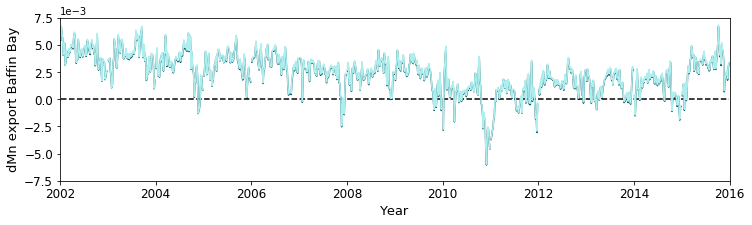

In [662]:
fig, ax = plt.subplots(1,1, figsize=(12,3))

ax.plot(dates_2002, np.sum(np.sum(-1*ts_2002_mn8,axis=2),axis=1), c=bdy_colours[4])
ax.plot(dates_2003, np.sum(np.sum(-1*ts_2003_mn8,axis=2),axis=1), c=bdy_colours[4])
ax.plot(dates_2004, np.sum(np.sum(-1*ts_2004_mn8,axis=2),axis=1), c=bdy_colours[4])
ax.plot(dates_2005, np.sum(np.sum(-1*ts_2005_mn8,axis=2),axis=1), c=bdy_colours[4])
ax.plot(dates_2006, np.sum(np.sum(-1*ts_2006_mn8,axis=2),axis=1), c=bdy_colours[4])
ax.plot(dates_2007, np.sum(np.sum(-1*ts_2007_mn8,axis=2),axis=1), c=bdy_colours[4])
ax.plot(dates_2008, np.sum(np.sum(-1*ts_2008_mn8,axis=2),axis=1), c=bdy_colours[4])
ax.plot(dates_2009, np.sum(np.sum(-1*ts_2009_mn8,axis=2),axis=1), c=bdy_colours[4])
ax.plot(dates_2010, np.sum(np.sum(-1*ts_2010_mn8,axis=2),axis=1), c=bdy_colours[4])
ax.plot(dates_2011, np.sum(np.sum(-1*ts_2011_mn8,axis=2),axis=1), c=bdy_colours[4])
ax.plot(dates_2012, np.sum(np.sum(-1*ts_2012_mn8,axis=2),axis=1), c=bdy_colours[4])
ax.plot(dates_2013, np.sum(np.sum(-1*ts_2013_mn8,axis=2),axis=1), c=bdy_colours[4])
ax.plot(dates_2014, np.sum(np.sum(-1*ts_2014_mn8,axis=2),axis=1), c=bdy_colours[4])
ax.plot(dates_2015, np.sum(np.sum(-1*ts_2015_mn8,axis=2),axis=1), c=bdy_colours[4])
ax.plot([dates_2002[0], dates_2015[-1]], [0, 0], '--k')

ax.plot(dates_2002, np.sum(np.sum(-1*riv_2002_mn8,axis=2),axis=1), c=bdy_colours[3])
ax.plot(dates_2003, np.sum(np.sum(-1*riv_2003_mn8,axis=2),axis=1), c=bdy_colours[3])
ax.plot(dates_2004, np.sum(np.sum(-1*riv_2004_mn8,axis=2),axis=1), c=bdy_colours[3])
ax.plot(dates_2005, np.sum(np.sum(-1*riv_2005_mn8,axis=2),axis=1), c=bdy_colours[3])
ax.plot(dates_2006, np.sum(np.sum(-1*riv_2006_mn8,axis=2),axis=1), c=bdy_colours[3])
ax.plot(dates_2007, np.sum(np.sum(-1*riv_2007_mn8,axis=2),axis=1), c=bdy_colours[3])
ax.plot(dates_2008, np.sum(np.sum(-1*riv_2008_mn8,axis=2),axis=1), c=bdy_colours[3])
ax.plot(dates_2009, np.sum(np.sum(-1*riv_2009_mn8,axis=2),axis=1), c=bdy_colours[3])
ax.plot(dates_2010, np.sum(np.sum(-1*riv_2010_mn8,axis=2),axis=1), c=bdy_colours[3])
ax.plot(dates_2011, np.sum(np.sum(-1*riv_2011_mn8,axis=2),axis=1), c=bdy_colours[3])
ax.plot(dates_2012, np.sum(np.sum(-1*riv_2012_mn8,axis=2),axis=1), c=bdy_colours[3])
ax.plot(dates_2013, np.sum(np.sum(-1*riv_2013_mn8,axis=2),axis=1), c=bdy_colours[3])
ax.plot(dates_2014, np.sum(np.sum(-1*riv_2014_mn8,axis=2),axis=1), c=bdy_colours[3])
ax.plot(dates_2015, np.sum(np.sum(-1*riv_2015_mn8,axis=2),axis=1), c=bdy_colours[3])

ax.set_xlim([dt.datetime(2002,1,1), dt.datetime(2016,1,1)])
ax.set_ylim([-0.75e-2, 0.75e-2])
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel('Year',fontsize=13)
ax.set_ylabel('dMn export Baffin Bay', fontsize=13)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/BB-time-series-20190920.png', bbox_inches='tight')

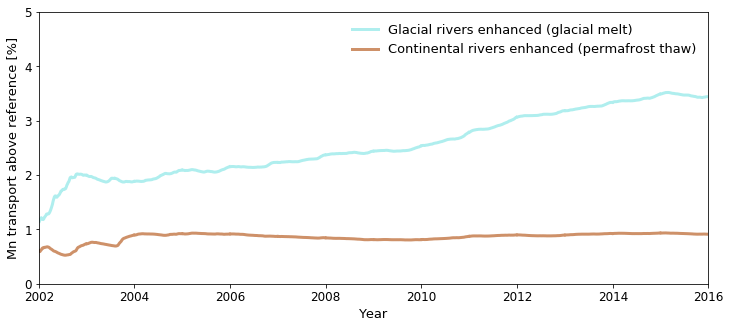

In [15]:
fig, ax = plt.subplots(1,1, figsize=(12,5))

ax.plot(dates_2002, np.divide(cumsum_riv2002-cumsum_2002,cumsum_2002)*100, linewidth=3, c=bdy_colours[3], \
       label='Glacial rivers enhanced (glacial melt)')
ax.plot(dates_2003, np.divide(cumsum_riv2003-cumsum_2003,cumsum_2003)*100, linewidth=3, c=bdy_colours[3])
ax.plot(dates_2004, np.divide(cumsum_riv2004-cumsum_2004,cumsum_2004)*100, linewidth=3, c=bdy_colours[3])
ax.plot(dates_2005, np.divide(cumsum_riv2005-cumsum_2005,cumsum_2005)*100, linewidth=3, c=bdy_colours[3])
ax.plot(dates_2006, np.divide(cumsum_riv2006-cumsum_2006,cumsum_2006)*100, linewidth=3, c=bdy_colours[3])
ax.plot(dates_2007, np.divide(cumsum_riv2007-cumsum_2007,cumsum_2007)*100, linewidth=3, c=bdy_colours[3])
ax.plot(dates_2008, np.divide(cumsum_riv2008-cumsum_2008,cumsum_2008)*100, linewidth=3, c=bdy_colours[3])
ax.plot(dates_2009, np.divide(cumsum_riv2009-cumsum_2009,cumsum_2009)*100, linewidth=3, c=bdy_colours[3])
ax.plot(dates_2010, np.divide(cumsum_riv2010-cumsum_2010,cumsum_2010)*100, linewidth=3, c=bdy_colours[3])
ax.plot(dates_2011, np.divide(cumsum_riv2011-cumsum_2011,cumsum_2011)*100, linewidth=3, c=bdy_colours[3])
ax.plot(dates_2012, np.divide(cumsum_riv2012-cumsum_2012,cumsum_2012)*100, linewidth=3, c=bdy_colours[3])
ax.plot(dates_2013, np.divide(cumsum_riv2013-cumsum_2013,cumsum_2013)*100, linewidth=3, c=bdy_colours[3])
ax.plot(dates_2014, np.divide(cumsum_riv2014-cumsum_2014,cumsum_2014)*100, linewidth=3, c=bdy_colours[3])
ax.plot(dates_2015, np.divide(cumsum_riv2015-cumsum_2015,cumsum_2015)*100, linewidth=3, c=bdy_colours[3])

ax.plot(dates_2002, np.divide(cumsum_con2002-cumsum_2002,cumsum_2002)*100, linewidth=3, c=bdy_colours[5], \
       label='Continental rivers enhanced (permafrost thaw)')
ax.plot(dates_2003, np.divide(cumsum_con2003-cumsum_2003,cumsum_2003)*100, linewidth=3, c=bdy_colours[5])
ax.plot(dates_2004, np.divide(cumsum_con2004-cumsum_2004,cumsum_2004)*100, linewidth=3, c=bdy_colours[5])
ax.plot(dates_2005, np.divide(cumsum_con2005-cumsum_2005,cumsum_2005)*100, linewidth=3, c=bdy_colours[5])
ax.plot(dates_2006, np.divide(cumsum_con2006-cumsum_2006,cumsum_2006)*100, linewidth=3, c=bdy_colours[5])
ax.plot(dates_2007, np.divide(cumsum_con2007-cumsum_2007,cumsum_2007)*100, linewidth=3, c=bdy_colours[5])
ax.plot(dates_2008, np.divide(cumsum_con2008-cumsum_2008,cumsum_2008)*100, linewidth=3, c=bdy_colours[5])
ax.plot(dates_2009, np.divide(cumsum_con2009-cumsum_2009,cumsum_2009)*100, linewidth=3, c=bdy_colours[5])
ax.plot(dates_2010, np.divide(cumsum_con2010-cumsum_2010,cumsum_2010)*100, linewidth=3, c=bdy_colours[5])
ax.plot(dates_2011, np.divide(cumsum_con2011-cumsum_2011,cumsum_2011)*100, linewidth=3, c=bdy_colours[5])
ax.plot(dates_2012, np.divide(cumsum_con2012-cumsum_2012,cumsum_2012)*100, linewidth=3, c=bdy_colours[5])
ax.plot(dates_2013, np.divide(cumsum_con2013-cumsum_2013,cumsum_2013)*100, linewidth=3, c=bdy_colours[5])
ax.plot(dates_2014, np.divide(cumsum_con2014-cumsum_2014,cumsum_2014)*100, linewidth=3, c=bdy_colours[5])
ax.plot(dates_2015, np.divide(cumsum_con2015-cumsum_2015,cumsum_2015)*100, linewidth=3, c=bdy_colours[5])

ax.set_xlim([dt.datetime(2002,1,1), dt.datetime(2016,1,1)])
ax.set_ylim([0,5])
ax.tick_params(axis='both', which='major', labelsize=12)

ax.set_xlabel('Year',fontsize=13)
ax.set_ylabel('Mn transport above reference [%]', fontsize=13)
ax.legend(fontsize=13, frameon=False)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/BB-sensitivity-time-series-20191001.png', bbox_inches='tight')

### Parry Channel:

In [15]:
cumsum_Pout_2002 = np.cumsum(np.sum(np.sum(-1*ts_2002_mn11,axis=2),axis=1))
cumsum_Pout_2003 = cumsum_Pout_2002[-1] + np.cumsum(np.sum(np.sum(-1*ts_2003_mn11,axis=2),axis=1))
cumsum_Pout_2004 = cumsum_Pout_2003[-1] + np.cumsum(np.sum(np.sum(-1*ts_2004_mn11,axis=2),axis=1))
cumsum_Pout_2005 = cumsum_Pout_2004[-1] + np.cumsum(np.sum(np.sum(-1*ts_2005_mn11,axis=2),axis=1))
cumsum_Pout_2006 = cumsum_Pout_2005[-1] + np.cumsum(np.sum(np.sum(-1*ts_2006_mn11,axis=2),axis=1))
cumsum_Pout_2007 = cumsum_Pout_2006[-1] + np.cumsum(np.sum(np.sum(-1*ts_2007_mn11,axis=2),axis=1))
cumsum_Pout_2008 = cumsum_Pout_2007[-1] + np.cumsum(np.sum(np.sum(-1*ts_2008_mn11,axis=2),axis=1))
cumsum_Pout_2009 = cumsum_Pout_2008[-1] + np.cumsum(np.sum(np.sum(-1*ts_2009_mn11,axis=2),axis=1))
cumsum_Pout_2010 = cumsum_Pout_2009[-1] + np.cumsum(np.sum(np.sum(-1*ts_2010_mn11,axis=2),axis=1))
cumsum_Pout_2011 = cumsum_Pout_2010[-1] + np.cumsum(np.sum(np.sum(-1*ts_2011_mn11,axis=2),axis=1))
cumsum_Pout_2012 = cumsum_Pout_2011[-1] + np.cumsum(np.sum(np.sum(-1*ts_2012_mn11,axis=2),axis=1))
cumsum_Pout_2013 = cumsum_Pout_2012[-1] + np.cumsum(np.sum(np.sum(-1*ts_2013_mn11,axis=2),axis=1))
cumsum_Pout_2014 = cumsum_Pout_2013[-1] + np.cumsum(np.sum(np.sum(-1*ts_2014_mn11,axis=2),axis=1))
cumsum_Pout_2015 = cumsum_Pout_2014[-1] + np.cumsum(np.sum(np.sum(-1*ts_2015_mn11,axis=2),axis=1))
cumsum_Pout_2016 = cumsum_Pout_2015[-1] + np.cumsum(np.sum(np.sum(-1*ts_2016_mn11,axis=2),axis=1))
cumsum_Pout_2017 = cumsum_Pout_2016[-1] + np.cumsum(np.sum(np.sum(-1*ts_2017_mn11,axis=2),axis=1))
cumsum_Pout_2018 = cumsum_Pout_2017[-1] + np.cumsum(np.sum(np.sum(-1*ts_2018_mn11,axis=2),axis=1))

cumsum_Pout_riv2002 = np.cumsum(np.sum(np.sum(-1*riv_2002_mn11,axis=2),axis=1))
cumsum_Pout_riv2003 = cumsum_Pout_riv2002[-1] + np.cumsum(np.sum(np.sum(-1*riv_2003_mn11,axis=2),axis=1))
cumsum_Pout_riv2004 = cumsum_Pout_riv2003[-1] + np.cumsum(np.sum(np.sum(-1*riv_2004_mn11,axis=2),axis=1))
cumsum_Pout_riv2005 = cumsum_Pout_riv2004[-1] + np.cumsum(np.sum(np.sum(-1*riv_2005_mn11,axis=2),axis=1))
cumsum_Pout_riv2006 = cumsum_Pout_riv2005[-1] + np.cumsum(np.sum(np.sum(-1*riv_2006_mn11,axis=2),axis=1))
cumsum_Pout_riv2007 = cumsum_Pout_riv2006[-1] + np.cumsum(np.sum(np.sum(-1*riv_2007_mn11,axis=2),axis=1))
cumsum_Pout_riv2008 = cumsum_Pout_riv2007[-1] + np.cumsum(np.sum(np.sum(-1*riv_2008_mn11,axis=2),axis=1))
cumsum_Pout_riv2009 = cumsum_Pout_riv2008[-1] + np.cumsum(np.sum(np.sum(-1*riv_2009_mn11,axis=2),axis=1))
cumsum_Pout_riv2010 = cumsum_Pout_riv2009[-1] + np.cumsum(np.sum(np.sum(-1*riv_2010_mn11,axis=2),axis=1))
cumsum_Pout_riv2011 = cumsum_Pout_riv2010[-1] + np.cumsum(np.sum(np.sum(-1*riv_2011_mn11,axis=2),axis=1))
cumsum_Pout_riv2012 = cumsum_Pout_riv2011[-1] + np.cumsum(np.sum(np.sum(-1*riv_2012_mn11,axis=2),axis=1))
cumsum_Pout_riv2013 = cumsum_Pout_riv2012[-1] + np.cumsum(np.sum(np.sum(-1*riv_2013_mn11,axis=2),axis=1))
cumsum_Pout_riv2014 = cumsum_Pout_riv2013[-1] + np.cumsum(np.sum(np.sum(-1*riv_2014_mn11,axis=2),axis=1))
cumsum_Pout_riv2015 = cumsum_Pout_riv2014[-1] + np.cumsum(np.sum(np.sum(-1*riv_2015_mn11,axis=2),axis=1))
cumsum_Pout_riv2016 = cumsum_Pout_riv2015[-1] + np.cumsum(np.sum(np.sum(-1*riv_2016_mn11,axis=2),axis=1))
cumsum_Pout_riv2017 = cumsum_Pout_riv2016[-1] + np.cumsum(np.sum(np.sum(-1*riv_2017_mn11,axis=2),axis=1))
cumsum_Pout_riv2018 = cumsum_Pout_riv2017[-1] + np.cumsum(np.sum(np.sum(-1*riv_2018_mn11,axis=2),axis=1))

cumsum_Pout_con2002 = np.cumsum(np.sum(np.sum(-1*con_2002_mn11,axis=2),axis=1))
cumsum_Pout_con2003 = cumsum_Pout_con2002[-1] + np.cumsum(np.sum(np.sum(-1*con_2003_mn11,axis=2),axis=1))
cumsum_Pout_con2004 = cumsum_Pout_con2003[-1] + np.cumsum(np.sum(np.sum(-1*con_2004_mn11,axis=2),axis=1))
cumsum_Pout_con2005 = cumsum_Pout_con2004[-1] + np.cumsum(np.sum(np.sum(-1*con_2005_mn11,axis=2),axis=1))
cumsum_Pout_con2006 = cumsum_Pout_con2005[-1] + np.cumsum(np.sum(np.sum(-1*con_2006_mn11,axis=2),axis=1))
cumsum_Pout_con2007 = cumsum_Pout_con2006[-1] + np.cumsum(np.sum(np.sum(-1*con_2007_mn11,axis=2),axis=1))
cumsum_Pout_con2008 = cumsum_Pout_con2007[-1] + np.cumsum(np.sum(np.sum(-1*con_2008_mn11,axis=2),axis=1))
cumsum_Pout_con2009 = cumsum_Pout_con2008[-1] + np.cumsum(np.sum(np.sum(-1*con_2009_mn11,axis=2),axis=1))
cumsum_Pout_con2010 = cumsum_Pout_con2009[-1] + np.cumsum(np.sum(np.sum(-1*con_2010_mn11,axis=2),axis=1))
cumsum_Pout_con2011 = cumsum_Pout_con2010[-1] + np.cumsum(np.sum(np.sum(-1*con_2011_mn11,axis=2),axis=1))
cumsum_Pout_con2012 = cumsum_Pout_con2011[-1] + np.cumsum(np.sum(np.sum(-1*con_2012_mn11,axis=2),axis=1))
cumsum_Pout_con2013 = cumsum_Pout_con2012[-1] + np.cumsum(np.sum(np.sum(-1*con_2013_mn11,axis=2),axis=1))
cumsum_Pout_con2014 = cumsum_Pout_con2013[-1] + np.cumsum(np.sum(np.sum(-1*con_2014_mn11,axis=2),axis=1))
cumsum_Pout_con2015 = cumsum_Pout_con2014[-1] + np.cumsum(np.sum(np.sum(-1*con_2015_mn11,axis=2),axis=1))
cumsum_Pout_con2016 = cumsum_Pout_con2015[-1] + np.cumsum(np.sum(np.sum(-1*con_2016_mn11,axis=2),axis=1))
cumsum_Pout_con2017 = cumsum_Pout_con2016[-1] + np.cumsum(np.sum(np.sum(-1*con_2017_mn11,axis=2),axis=1))
cumsum_Pout_con2018 = cumsum_Pout_con2017[-1] + np.cumsum(np.sum(np.sum(-1*con_2018_mn11,axis=2),axis=1))

In [16]:
cumsum_Pin_2002 = np.cumsum(np.sum(np.sum(-1*ts_2002_mn2,axis=2),axis=1))
cumsum_Pin_2003 = cumsum_Pin_2002[-1] + np.cumsum(np.sum(np.sum(-1*ts_2003_mn2,axis=2),axis=1))
cumsum_Pin_2004 = cumsum_Pin_2003[-1] + np.cumsum(np.sum(np.sum(-1*ts_2004_mn2,axis=2),axis=1))
cumsum_Pin_2005 = cumsum_Pin_2004[-1] + np.cumsum(np.sum(np.sum(-1*ts_2005_mn2,axis=2),axis=1))
cumsum_Pin_2006 = cumsum_Pin_2005[-1] + np.cumsum(np.sum(np.sum(-1*ts_2006_mn2,axis=2),axis=1))
cumsum_Pin_2007 = cumsum_Pin_2006[-1] + np.cumsum(np.sum(np.sum(-1*ts_2007_mn2,axis=2),axis=1))
cumsum_Pin_2008 = cumsum_Pin_2007[-1] + np.cumsum(np.sum(np.sum(-1*ts_2008_mn2,axis=2),axis=1))
cumsum_Pin_2009 = cumsum_Pin_2008[-1] + np.cumsum(np.sum(np.sum(-1*ts_2009_mn2,axis=2),axis=1))
cumsum_Pin_2010 = cumsum_Pin_2009[-1] + np.cumsum(np.sum(np.sum(-1*ts_2010_mn2,axis=2),axis=1))
cumsum_Pin_2011 = cumsum_Pin_2010[-1] + np.cumsum(np.sum(np.sum(-1*ts_2011_mn2,axis=2),axis=1))
cumsum_Pin_2012 = cumsum_Pin_2011[-1] + np.cumsum(np.sum(np.sum(-1*ts_2012_mn2,axis=2),axis=1))
cumsum_Pin_2013 = cumsum_Pin_2012[-1] + np.cumsum(np.sum(np.sum(-1*ts_2013_mn2,axis=2),axis=1))
cumsum_Pin_2014 = cumsum_Pin_2013[-1] + np.cumsum(np.sum(np.sum(-1*ts_2014_mn2,axis=2),axis=1))
cumsum_Pin_2015 = cumsum_Pin_2014[-1] + np.cumsum(np.sum(np.sum(-1*ts_2015_mn2,axis=2),axis=1))
cumsum_Pin_2016 = cumsum_Pin_2015[-1] + np.cumsum(np.sum(np.sum(-1*ts_2016_mn2,axis=2),axis=1))
cumsum_Pin_2017 = cumsum_Pin_2016[-1] + np.cumsum(np.sum(np.sum(-1*ts_2017_mn2,axis=2),axis=1))
cumsum_Pin_2018 = cumsum_Pin_2017[-1] + np.cumsum(np.sum(np.sum(-1*ts_2018_mn2,axis=2),axis=1))

cumsum_Pin_riv2002 = np.cumsum(np.sum(np.sum(-1*riv_2002_mn2,axis=2),axis=1))
cumsum_Pin_riv2003 = cumsum_Pin_riv2002[-1] + np.cumsum(np.sum(np.sum(-1*riv_2003_mn2,axis=2),axis=1))
cumsum_Pin_riv2004 = cumsum_Pin_riv2003[-1] + np.cumsum(np.sum(np.sum(-1*riv_2004_mn2,axis=2),axis=1))
cumsum_Pin_riv2005 = cumsum_Pin_riv2004[-1] + np.cumsum(np.sum(np.sum(-1*riv_2005_mn2,axis=2),axis=1))
cumsum_Pin_riv2006 = cumsum_Pin_riv2005[-1] + np.cumsum(np.sum(np.sum(-1*riv_2006_mn2,axis=2),axis=1))
cumsum_Pin_riv2007 = cumsum_Pin_riv2006[-1] + np.cumsum(np.sum(np.sum(-1*riv_2007_mn2,axis=2),axis=1))
cumsum_Pin_riv2008 = cumsum_Pin_riv2007[-1] + np.cumsum(np.sum(np.sum(-1*riv_2008_mn2,axis=2),axis=1))
cumsum_Pin_riv2009 = cumsum_Pin_riv2008[-1] + np.cumsum(np.sum(np.sum(-1*riv_2009_mn2,axis=2),axis=1))
cumsum_Pin_riv2010 = cumsum_Pin_riv2009[-1] + np.cumsum(np.sum(np.sum(-1*riv_2010_mn2,axis=2),axis=1))
cumsum_Pin_riv2011 = cumsum_Pin_riv2010[-1] + np.cumsum(np.sum(np.sum(-1*riv_2011_mn2,axis=2),axis=1))
cumsum_Pin_riv2012 = cumsum_Pin_riv2011[-1] + np.cumsum(np.sum(np.sum(-1*riv_2012_mn2,axis=2),axis=1))
cumsum_Pin_riv2013 = cumsum_Pin_riv2012[-1] + np.cumsum(np.sum(np.sum(-1*riv_2013_mn2,axis=2),axis=1))
cumsum_Pin_riv2014 = cumsum_Pin_riv2013[-1] + np.cumsum(np.sum(np.sum(-1*riv_2014_mn2,axis=2),axis=1))
cumsum_Pin_riv2015 = cumsum_Pin_riv2014[-1] + np.cumsum(np.sum(np.sum(-1*riv_2015_mn2,axis=2),axis=1))
cumsum_Pin_riv2016 = cumsum_Pin_riv2015[-1] + np.cumsum(np.sum(np.sum(-1*riv_2016_mn2,axis=2),axis=1))
cumsum_Pin_riv2017 = cumsum_Pin_riv2016[-1] + np.cumsum(np.sum(np.sum(-1*riv_2017_mn2,axis=2),axis=1))
cumsum_Pin_riv2018 = cumsum_Pin_riv2017[-1] + np.cumsum(np.sum(np.sum(-1*riv_2018_mn2,axis=2),axis=1))

cumsum_Pin_con2002 = np.cumsum(np.sum(np.sum(-1*con_2002_mn2,axis=2),axis=1))
cumsum_Pin_con2003 = cumsum_Pin_con2002[-1] + np.cumsum(np.sum(np.sum(-1*con_2003_mn2,axis=2),axis=1))
cumsum_Pin_con2004 = cumsum_Pin_con2003[-1] + np.cumsum(np.sum(np.sum(-1*con_2004_mn2,axis=2),axis=1))
cumsum_Pin_con2005 = cumsum_Pin_con2004[-1] + np.cumsum(np.sum(np.sum(-1*con_2005_mn2,axis=2),axis=1))
cumsum_Pin_con2006 = cumsum_Pin_con2005[-1] + np.cumsum(np.sum(np.sum(-1*con_2006_mn2,axis=2),axis=1))
cumsum_Pin_con2007 = cumsum_Pin_con2006[-1] + np.cumsum(np.sum(np.sum(-1*con_2007_mn2,axis=2),axis=1))
cumsum_Pin_con2008 = cumsum_Pin_con2007[-1] + np.cumsum(np.sum(np.sum(-1*con_2008_mn2,axis=2),axis=1))
cumsum_Pin_con2009 = cumsum_Pin_con2008[-1] + np.cumsum(np.sum(np.sum(-1*con_2009_mn2,axis=2),axis=1))
cumsum_Pin_con2010 = cumsum_Pin_con2009[-1] + np.cumsum(np.sum(np.sum(-1*con_2010_mn2,axis=2),axis=1))
cumsum_Pin_con2011 = cumsum_Pin_con2010[-1] + np.cumsum(np.sum(np.sum(-1*con_2011_mn2,axis=2),axis=1))
cumsum_Pin_con2012 = cumsum_Pin_con2011[-1] + np.cumsum(np.sum(np.sum(-1*con_2012_mn2,axis=2),axis=1))
cumsum_Pin_con2013 = cumsum_Pin_con2012[-1] + np.cumsum(np.sum(np.sum(-1*con_2013_mn2,axis=2),axis=1))
cumsum_Pin_con2014 = cumsum_Pin_con2013[-1] + np.cumsum(np.sum(np.sum(-1*con_2014_mn2,axis=2),axis=1))
cumsum_Pin_con2015 = cumsum_Pin_con2014[-1] + np.cumsum(np.sum(np.sum(-1*con_2015_mn2,axis=2),axis=1))
cumsum_Pin_con2016 = cumsum_Pin_con2015[-1] + np.cumsum(np.sum(np.sum(-1*con_2016_mn2,axis=2),axis=1))
cumsum_Pin_con2017 = cumsum_Pin_con2016[-1] + np.cumsum(np.sum(np.sum(-1*con_2017_mn2,axis=2),axis=1))
cumsum_Pin_con2018 = cumsum_Pin_con2017[-1] + np.cumsum(np.sum(np.sum(-1*con_2018_mn2,axis=2),axis=1))

In [17]:
cumsum_Parry_2002  = -cumsum_Pin_2002 + cumsum_Pout_2002
cumsum_Parry_2003  = -cumsum_Pin_2003 + cumsum_Pout_2003
cumsum_Parry_2004  = -cumsum_Pin_2004 + cumsum_Pout_2004
cumsum_Parry_2005  = -cumsum_Pin_2005 + cumsum_Pout_2005
cumsum_Parry_2006  = -cumsum_Pin_2006 + cumsum_Pout_2006
cumsum_Parry_2007  = -cumsum_Pin_2007 + cumsum_Pout_2007
cumsum_Parry_2008  = -cumsum_Pin_2008 + cumsum_Pout_2008
cumsum_Parry_2009  = -cumsum_Pin_2009 + cumsum_Pout_2009
cumsum_Parry_2010  = -cumsum_Pin_2010 + cumsum_Pout_2010
cumsum_Parry_2011  = -cumsum_Pin_2011 + cumsum_Pout_2011
cumsum_Parry_2012  = -cumsum_Pin_2012 + cumsum_Pout_2012
cumsum_Parry_2013  = -cumsum_Pin_2013 + cumsum_Pout_2013
cumsum_Parry_2014  = -cumsum_Pin_2014 + cumsum_Pout_2014
cumsum_Parry_2015  = -cumsum_Pin_2015 + cumsum_Pout_2015
cumsum_Parry_2016  = -cumsum_Pin_2016 + cumsum_Pout_2016
cumsum_Parry_2017  = -cumsum_Pin_2017 + cumsum_Pout_2017
cumsum_Parry_2018  = -cumsum_Pin_2018 + cumsum_Pout_2018

In [18]:
cumsum_Parry_riv_2002  = -cumsum_Pin_riv2002 + cumsum_Pout_riv2002
cumsum_Parry_riv_2003  = -cumsum_Pin_riv2003 + cumsum_Pout_riv2003
cumsum_Parry_riv_2004  = -cumsum_Pin_riv2004 + cumsum_Pout_riv2004
cumsum_Parry_riv_2005  = -cumsum_Pin_riv2005 + cumsum_Pout_riv2005
cumsum_Parry_riv_2006  = -cumsum_Pin_riv2006 + cumsum_Pout_riv2006
cumsum_Parry_riv_2007  = -cumsum_Pin_riv2007 + cumsum_Pout_riv2007
cumsum_Parry_riv_2008  = -cumsum_Pin_riv2008 + cumsum_Pout_riv2008
cumsum_Parry_riv_2009  = -cumsum_Pin_riv2009 + cumsum_Pout_riv2009
cumsum_Parry_riv_2010  = -cumsum_Pin_riv2010 + cumsum_Pout_riv2010
cumsum_Parry_riv_2011  = -cumsum_Pin_riv2011 + cumsum_Pout_riv2011
cumsum_Parry_riv_2012  = -cumsum_Pin_riv2012 + cumsum_Pout_riv2012
cumsum_Parry_riv_2013  = -cumsum_Pin_riv2013 + cumsum_Pout_riv2013
cumsum_Parry_riv_2014  = -cumsum_Pin_riv2014 + cumsum_Pout_riv2014
cumsum_Parry_riv_2015  = -cumsum_Pin_riv2015 + cumsum_Pout_riv2015
cumsum_Parry_riv_2016  = -cumsum_Pin_riv2016 + cumsum_Pout_riv2016
cumsum_Parry_riv_2017  = -cumsum_Pin_riv2017 + cumsum_Pout_riv2017
cumsum_Parry_riv_2018  = -cumsum_Pin_riv2018 + cumsum_Pout_riv2018

In [19]:
cumsum_Parry_con_2002  = -cumsum_Pin_con2002 + cumsum_Pout_con2002
cumsum_Parry_con_2003  = -cumsum_Pin_con2003 + cumsum_Pout_con2003
cumsum_Parry_con_2004  = -cumsum_Pin_con2004 + cumsum_Pout_con2004
cumsum_Parry_con_2005  = -cumsum_Pin_con2005 + cumsum_Pout_con2005
cumsum_Parry_con_2006  = -cumsum_Pin_con2006 + cumsum_Pout_con2006
cumsum_Parry_con_2007  = -cumsum_Pin_con2007 + cumsum_Pout_con2007
cumsum_Parry_con_2008  = -cumsum_Pin_con2008 + cumsum_Pout_con2008
cumsum_Parry_con_2009  = -cumsum_Pin_con2009 + cumsum_Pout_con2009
cumsum_Parry_con_2010  = -cumsum_Pin_con2010 + cumsum_Pout_con2010
cumsum_Parry_con_2011  = -cumsum_Pin_con2011 + cumsum_Pout_con2011
cumsum_Parry_con_2012  = -cumsum_Pin_con2012 + cumsum_Pout_con2012
cumsum_Parry_con_2013  = -cumsum_Pin_con2013 + cumsum_Pout_con2013
cumsum_Parry_con_2014  = -cumsum_Pin_con2014 + cumsum_Pout_con2014
cumsum_Parry_con_2015  = -cumsum_Pin_con2015 + cumsum_Pout_con2015
cumsum_Parry_con_2016  = -cumsum_Pin_con2016 + cumsum_Pout_con2016
cumsum_Parry_con_2017  = -cumsum_Pin_con2017 + cumsum_Pout_con2017
cumsum_Parry_con_2018  = -cumsum_Pin_con2018 + cumsum_Pout_con2018

Text(0.5, 1.0, 'Parry Channel')

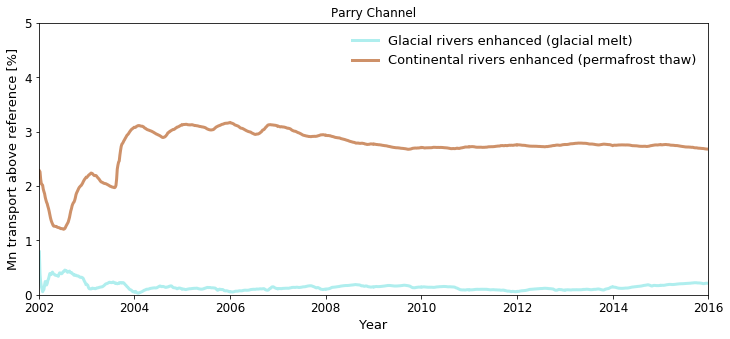

In [21]:
fig, ax = plt.subplots(1,1, figsize=(12,5))

ax.plot(dates_2002, np.divide(cumsum_Parry_riv_2002-cumsum_Parry_2002,cumsum_Parry_2002)*100, linewidth=3, c=bdy_colours[3], \
       label='Glacial rivers enhanced (glacial melt)')
ax.plot(dates_2003, np.divide(cumsum_Parry_riv_2003-cumsum_Parry_2003,cumsum_Parry_2003)*100, linewidth=3, c=bdy_colours[3])
ax.plot(dates_2004, np.divide(cumsum_Parry_riv_2004-cumsum_Parry_2004,cumsum_Parry_2004)*100, linewidth=3, c=bdy_colours[3])
ax.plot(dates_2005, np.divide(cumsum_Parry_riv_2005-cumsum_Parry_2005,cumsum_Parry_2005)*100, linewidth=3, c=bdy_colours[3])
ax.plot(dates_2006, np.divide(cumsum_Parry_riv_2006-cumsum_Parry_2006,cumsum_Parry_2006)*100, linewidth=3, c=bdy_colours[3])
ax.plot(dates_2007, np.divide(cumsum_Parry_riv_2007-cumsum_Parry_2007,cumsum_Parry_2007)*100, linewidth=3, c=bdy_colours[3])
ax.plot(dates_2008, np.divide(cumsum_Parry_riv_2008-cumsum_Parry_2008,cumsum_Parry_2008)*100, linewidth=3, c=bdy_colours[3])
ax.plot(dates_2009, np.divide(cumsum_Parry_riv_2009-cumsum_Parry_2009,cumsum_Parry_2009)*100, linewidth=3, c=bdy_colours[3])
ax.plot(dates_2010, np.divide(cumsum_Parry_riv_2010-cumsum_Parry_2010,cumsum_Parry_2010)*100, linewidth=3, c=bdy_colours[3])
ax.plot(dates_2011, np.divide(cumsum_Parry_riv_2011-cumsum_Parry_2011,cumsum_Parry_2011)*100, linewidth=3, c=bdy_colours[3])
ax.plot(dates_2012, np.divide(cumsum_Parry_riv_2012-cumsum_Parry_2012,cumsum_Parry_2012)*100, linewidth=3, c=bdy_colours[3])
ax.plot(dates_2013, np.divide(cumsum_Parry_riv_2013-cumsum_Parry_2013,cumsum_Parry_2013)*100, linewidth=3, c=bdy_colours[3])
ax.plot(dates_2014, np.divide(cumsum_Parry_riv_2014-cumsum_Parry_2014,cumsum_Parry_2014)*100, linewidth=3, c=bdy_colours[3])
ax.plot(dates_2015, np.divide(cumsum_Parry_riv_2015-cumsum_Parry_2015,cumsum_Parry_2015)*100, linewidth=3, c=bdy_colours[3])


ax.plot(dates_2002, np.divide(cumsum_Parry_con_2002-cumsum_Parry_2002,cumsum_Parry_2002)*100, linewidth=3, c=bdy_colours[5], \
       label='Continental rivers enhanced (permafrost thaw)')
ax.plot(dates_2003, np.divide(cumsum_Parry_con_2003-cumsum_Parry_2003,cumsum_Parry_2003)*100, linewidth=3, c=bdy_colours[5])
ax.plot(dates_2004, np.divide(cumsum_Parry_con_2004-cumsum_Parry_2004,cumsum_Parry_2004)*100, linewidth=3, c=bdy_colours[5])
ax.plot(dates_2005, np.divide(cumsum_Parry_con_2005-cumsum_Parry_2005,cumsum_Parry_2005)*100, linewidth=3, c=bdy_colours[5])
ax.plot(dates_2006, np.divide(cumsum_Parry_con_2006-cumsum_Parry_2006,cumsum_Parry_2006)*100, linewidth=3, c=bdy_colours[5])
ax.plot(dates_2007, np.divide(cumsum_Parry_con_2007-cumsum_Parry_2007,cumsum_Parry_2007)*100, linewidth=3, c=bdy_colours[5])
ax.plot(dates_2008, np.divide(cumsum_Parry_con_2008-cumsum_Parry_2008,cumsum_Parry_2008)*100, linewidth=3, c=bdy_colours[5])
ax.plot(dates_2009, np.divide(cumsum_Parry_con_2009-cumsum_Parry_2009,cumsum_Parry_2009)*100, linewidth=3, c=bdy_colours[5])
ax.plot(dates_2010, np.divide(cumsum_Parry_con_2010-cumsum_Parry_2010,cumsum_Parry_2010)*100, linewidth=3, c=bdy_colours[5])
ax.plot(dates_2011, np.divide(cumsum_Parry_con_2011-cumsum_Parry_2011,cumsum_Parry_2011)*100, linewidth=3, c=bdy_colours[5])
ax.plot(dates_2012, np.divide(cumsum_Parry_con_2012-cumsum_Parry_2012,cumsum_Parry_2012)*100, linewidth=3, c=bdy_colours[5])
ax.plot(dates_2013, np.divide(cumsum_Parry_con_2013-cumsum_Parry_2013,cumsum_Parry_2013)*100, linewidth=3, c=bdy_colours[5])
ax.plot(dates_2014, np.divide(cumsum_Parry_con_2014-cumsum_Parry_2014,cumsum_Parry_2014)*100, linewidth=3, c=bdy_colours[5])
ax.plot(dates_2015, np.divide(cumsum_Parry_con_2015-cumsum_Parry_2015,cumsum_Parry_2015)*100, linewidth=3, c=bdy_colours[5])


ax.set_xlim([dt.datetime(2002,1,1), dt.datetime(2016,1,1)])
ax.set_ylim([0,5])
ax.tick_params(axis='both', which='major', labelsize=12)

ax.set_xlabel('Year',fontsize=13)
ax.set_ylabel('Mn transport above reference [%]', fontsize=13)
ax.legend(fontsize=13, frameon=False)

ax.set_title('Parry Channel')

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/BB-sensitivity-time-series-20191001.png', bbox_inches='tight')

### Nares Strait:

In [20]:
cumsum_Nout_2002 = np.cumsum(np.sum(np.sum(-1*ts_2002_mn10,axis=2),axis=1))
cumsum_Nout_2003 = cumsum_Nout_2002[-1] + np.cumsum(np.sum(np.sum(-1*ts_2003_mn10,axis=2),axis=1))
cumsum_Nout_2004 = cumsum_Nout_2003[-1] + np.cumsum(np.sum(np.sum(-1*ts_2004_mn10,axis=2),axis=1))
cumsum_Nout_2005 = cumsum_Nout_2004[-1] + np.cumsum(np.sum(np.sum(-1*ts_2005_mn10,axis=2),axis=1))
cumsum_Nout_2006 = cumsum_Nout_2005[-1] + np.cumsum(np.sum(np.sum(-1*ts_2006_mn10,axis=2),axis=1))
cumsum_Nout_2007 = cumsum_Nout_2006[-1] + np.cumsum(np.sum(np.sum(-1*ts_2007_mn10,axis=2),axis=1))
cumsum_Nout_2008 = cumsum_Nout_2007[-1] + np.cumsum(np.sum(np.sum(-1*ts_2008_mn10,axis=2),axis=1))
cumsum_Nout_2009 = cumsum_Nout_2008[-1] + np.cumsum(np.sum(np.sum(-1*ts_2009_mn10,axis=2),axis=1))
cumsum_Nout_2010 = cumsum_Nout_2009[-1] + np.cumsum(np.sum(np.sum(-1*ts_2010_mn10,axis=2),axis=1))
cumsum_Nout_2011 = cumsum_Nout_2010[-1] + np.cumsum(np.sum(np.sum(-1*ts_2011_mn10,axis=2),axis=1))
cumsum_Nout_2012 = cumsum_Nout_2011[-1] + np.cumsum(np.sum(np.sum(-1*ts_2012_mn10,axis=2),axis=1))
cumsum_Nout_2013 = cumsum_Nout_2012[-1] + np.cumsum(np.sum(np.sum(-1*ts_2013_mn10,axis=2),axis=1))
cumsum_Nout_2014 = cumsum_Nout_2013[-1] + np.cumsum(np.sum(np.sum(-1*ts_2014_mn10,axis=2),axis=1))
cumsum_Nout_2015 = cumsum_Nout_2014[-1] + np.cumsum(np.sum(np.sum(-1*ts_2015_mn10,axis=2),axis=1))
cumsum_Nout_2016 = cumsum_Nout_2015[-1] + np.cumsum(np.sum(np.sum(-1*ts_2016_mn10,axis=2),axis=1))
cumsum_Nout_2017 = cumsum_Nout_2016[-1] + np.cumsum(np.sum(np.sum(-1*ts_2017_mn10,axis=2),axis=1))
cumsum_Nout_2018 = cumsum_Nout_2017[-1] + np.cumsum(np.sum(np.sum(-1*ts_2018_mn10,axis=2),axis=1))

cumsum_Nout_riv2002 = np.cumsum(np.sum(np.sum(-1*riv_2002_mn10,axis=2),axis=1))
cumsum_Nout_riv2003 = cumsum_Nout_riv2002[-1] + np.cumsum(np.sum(np.sum(-1*riv_2003_mn10,axis=2),axis=1))
cumsum_Nout_riv2004 = cumsum_Nout_riv2003[-1] + np.cumsum(np.sum(np.sum(-1*riv_2004_mn10,axis=2),axis=1))
cumsum_Nout_riv2005 = cumsum_Nout_riv2004[-1] + np.cumsum(np.sum(np.sum(-1*riv_2005_mn10,axis=2),axis=1))
cumsum_Nout_riv2006 = cumsum_Nout_riv2005[-1] + np.cumsum(np.sum(np.sum(-1*riv_2006_mn10,axis=2),axis=1))
cumsum_Nout_riv2007 = cumsum_Nout_riv2006[-1] + np.cumsum(np.sum(np.sum(-1*riv_2007_mn10,axis=2),axis=1))
cumsum_Nout_riv2008 = cumsum_Nout_riv2007[-1] + np.cumsum(np.sum(np.sum(-1*riv_2008_mn10,axis=2),axis=1))
cumsum_Nout_riv2009 = cumsum_Nout_riv2008[-1] + np.cumsum(np.sum(np.sum(-1*riv_2009_mn10,axis=2),axis=1))
cumsum_Nout_riv2010 = cumsum_Nout_riv2009[-1] + np.cumsum(np.sum(np.sum(-1*riv_2010_mn10,axis=2),axis=1))
cumsum_Nout_riv2011 = cumsum_Nout_riv2010[-1] + np.cumsum(np.sum(np.sum(-1*riv_2011_mn10,axis=2),axis=1))
cumsum_Nout_riv2012 = cumsum_Nout_riv2011[-1] + np.cumsum(np.sum(np.sum(-1*riv_2012_mn10,axis=2),axis=1))
cumsum_Nout_riv2013 = cumsum_Nout_riv2012[-1] + np.cumsum(np.sum(np.sum(-1*riv_2013_mn10,axis=2),axis=1))
cumsum_Nout_riv2014 = cumsum_Nout_riv2013[-1] + np.cumsum(np.sum(np.sum(-1*riv_2014_mn10,axis=2),axis=1))
cumsum_Nout_riv2015 = cumsum_Nout_riv2014[-1] + np.cumsum(np.sum(np.sum(-1*riv_2015_mn10,axis=2),axis=1))
cumsum_Nout_riv2016 = cumsum_Nout_riv2015[-1] + np.cumsum(np.sum(np.sum(-1*riv_2016_mn10,axis=2),axis=1))
cumsum_Nout_riv2017 = cumsum_Nout_riv2016[-1] + np.cumsum(np.sum(np.sum(-1*riv_2017_mn10,axis=2),axis=1))
cumsum_Nout_riv2018 = cumsum_Nout_riv2017[-1] + np.cumsum(np.sum(np.sum(-1*riv_2018_mn10,axis=2),axis=1))

cumsum_Nout_con2002 = np.cumsum(np.sum(np.sum(-1*con_2002_mn10,axis=2),axis=1))
cumsum_Nout_con2003 = cumsum_Nout_con2002[-1] + np.cumsum(np.sum(np.sum(-1*con_2003_mn10,axis=2),axis=1))
cumsum_Nout_con2004 = cumsum_Nout_con2003[-1] + np.cumsum(np.sum(np.sum(-1*con_2004_mn10,axis=2),axis=1))
cumsum_Nout_con2005 = cumsum_Nout_con2004[-1] + np.cumsum(np.sum(np.sum(-1*con_2005_mn10,axis=2),axis=1))
cumsum_Nout_con2006 = cumsum_Nout_con2005[-1] + np.cumsum(np.sum(np.sum(-1*con_2006_mn10,axis=2),axis=1))
cumsum_Nout_con2007 = cumsum_Nout_con2006[-1] + np.cumsum(np.sum(np.sum(-1*con_2007_mn10,axis=2),axis=1))
cumsum_Nout_con2008 = cumsum_Nout_con2007[-1] + np.cumsum(np.sum(np.sum(-1*con_2008_mn10,axis=2),axis=1))
cumsum_Nout_con2009 = cumsum_Nout_con2008[-1] + np.cumsum(np.sum(np.sum(-1*con_2009_mn10,axis=2),axis=1))
cumsum_Nout_con2010 = cumsum_Nout_con2009[-1] + np.cumsum(np.sum(np.sum(-1*con_2010_mn10,axis=2),axis=1))
cumsum_Nout_con2011 = cumsum_Nout_con2010[-1] + np.cumsum(np.sum(np.sum(-1*con_2011_mn10,axis=2),axis=1))
cumsum_Nout_con2012 = cumsum_Nout_con2011[-1] + np.cumsum(np.sum(np.sum(-1*con_2012_mn10,axis=2),axis=1))
cumsum_Nout_con2013 = cumsum_Nout_con2012[-1] + np.cumsum(np.sum(np.sum(-1*con_2013_mn10,axis=2),axis=1))
cumsum_Nout_con2014 = cumsum_Nout_con2013[-1] + np.cumsum(np.sum(np.sum(-1*con_2014_mn10,axis=2),axis=1))
cumsum_Nout_con2015 = cumsum_Nout_con2014[-1] + np.cumsum(np.sum(np.sum(-1*con_2015_mn10,axis=2),axis=1))
cumsum_Nout_con2016 = cumsum_Nout_con2015[-1] + np.cumsum(np.sum(np.sum(-1*con_2016_mn10,axis=2),axis=1))
cumsum_Nout_con2017 = cumsum_Nout_con2016[-1] + np.cumsum(np.sum(np.sum(-1*con_2017_mn10,axis=2),axis=1))
cumsum_Nout_con2018 = cumsum_Nout_con2017[-1] + np.cumsum(np.sum(np.sum(-1*con_2018_mn10,axis=2),axis=1))

In [21]:
cumsum_Nin_2002 = np.cumsum(np.sum(np.sum(-1*ts_2002_mn7,axis=2),axis=1))
cumsum_Nin_2003 = cumsum_Nin_2002[-1] + np.cumsum(np.sum(np.sum(-1*ts_2003_mn7,axis=2),axis=1))
cumsum_Nin_2004 = cumsum_Nin_2003[-1] + np.cumsum(np.sum(np.sum(-1*ts_2004_mn7,axis=2),axis=1))
cumsum_Nin_2005 = cumsum_Nin_2004[-1] + np.cumsum(np.sum(np.sum(-1*ts_2005_mn7,axis=2),axis=1))
cumsum_Nin_2006 = cumsum_Nin_2005[-1] + np.cumsum(np.sum(np.sum(-1*ts_2006_mn7,axis=2),axis=1))
cumsum_Nin_2007 = cumsum_Nin_2006[-1] + np.cumsum(np.sum(np.sum(-1*ts_2007_mn7,axis=2),axis=1))
cumsum_Nin_2008 = cumsum_Nin_2007[-1] + np.cumsum(np.sum(np.sum(-1*ts_2008_mn7,axis=2),axis=1))
cumsum_Nin_2009 = cumsum_Nin_2008[-1] + np.cumsum(np.sum(np.sum(-1*ts_2009_mn7,axis=2),axis=1))
cumsum_Nin_2010 = cumsum_Nin_2009[-1] + np.cumsum(np.sum(np.sum(-1*ts_2010_mn7,axis=2),axis=1))
cumsum_Nin_2011 = cumsum_Nin_2010[-1] + np.cumsum(np.sum(np.sum(-1*ts_2011_mn7,axis=2),axis=1))
cumsum_Nin_2012 = cumsum_Nin_2011[-1] + np.cumsum(np.sum(np.sum(-1*ts_2012_mn7,axis=2),axis=1))
cumsum_Nin_2013 = cumsum_Nin_2012[-1] + np.cumsum(np.sum(np.sum(-1*ts_2013_mn7,axis=2),axis=1))
cumsum_Nin_2014 = cumsum_Nin_2013[-1] + np.cumsum(np.sum(np.sum(-1*ts_2014_mn7,axis=2),axis=1))
cumsum_Nin_2015 = cumsum_Nin_2014[-1] + np.cumsum(np.sum(np.sum(-1*ts_2015_mn7,axis=2),axis=1))
cumsum_Nin_2016 = cumsum_Nin_2015[-1] + np.cumsum(np.sum(np.sum(-1*ts_2016_mn7,axis=2),axis=1))
cumsum_Nin_2017 = cumsum_Nin_2016[-1] + np.cumsum(np.sum(np.sum(-1*ts_2017_mn7,axis=2),axis=1))
cumsum_Nin_2018 = cumsum_Nin_2017[-1] + np.cumsum(np.sum(np.sum(-1*ts_2018_mn7,axis=2),axis=1))

cumsum_Nin_riv2002 = np.cumsum(np.sum(np.sum(-1*riv_2002_mn7,axis=2),axis=1))
cumsum_Nin_riv2003 = cumsum_Nin_riv2002[-1] + np.cumsum(np.sum(np.sum(-1*riv_2003_mn7,axis=2),axis=1))
cumsum_Nin_riv2004 = cumsum_Nin_riv2003[-1] + np.cumsum(np.sum(np.sum(-1*riv_2004_mn7,axis=2),axis=1))
cumsum_Nin_riv2005 = cumsum_Nin_riv2004[-1] + np.cumsum(np.sum(np.sum(-1*riv_2005_mn7,axis=2),axis=1))
cumsum_Nin_riv2006 = cumsum_Nin_riv2005[-1] + np.cumsum(np.sum(np.sum(-1*riv_2006_mn7,axis=2),axis=1))
cumsum_Nin_riv2007 = cumsum_Nin_riv2006[-1] + np.cumsum(np.sum(np.sum(-1*riv_2007_mn7,axis=2),axis=1))
cumsum_Nin_riv2008 = cumsum_Nin_riv2007[-1] + np.cumsum(np.sum(np.sum(-1*riv_2008_mn7,axis=2),axis=1))
cumsum_Nin_riv2009 = cumsum_Nin_riv2008[-1] + np.cumsum(np.sum(np.sum(-1*riv_2009_mn7,axis=2),axis=1))
cumsum_Nin_riv2010 = cumsum_Nin_riv2009[-1] + np.cumsum(np.sum(np.sum(-1*riv_2010_mn7,axis=2),axis=1))
cumsum_Nin_riv2011 = cumsum_Nin_riv2010[-1] + np.cumsum(np.sum(np.sum(-1*riv_2011_mn7,axis=2),axis=1))
cumsum_Nin_riv2012 = cumsum_Nin_riv2011[-1] + np.cumsum(np.sum(np.sum(-1*riv_2012_mn7,axis=2),axis=1))
cumsum_Nin_riv2013 = cumsum_Nin_riv2012[-1] + np.cumsum(np.sum(np.sum(-1*riv_2013_mn7,axis=2),axis=1))
cumsum_Nin_riv2014 = cumsum_Nin_riv2013[-1] + np.cumsum(np.sum(np.sum(-1*riv_2014_mn7,axis=2),axis=1))
cumsum_Nin_riv2015 = cumsum_Nin_riv2014[-1] + np.cumsum(np.sum(np.sum(-1*riv_2015_mn7,axis=2),axis=1))
cumsum_Nin_riv2016 = cumsum_Nin_riv2015[-1] + np.cumsum(np.sum(np.sum(-1*riv_2016_mn7,axis=2),axis=1))
cumsum_Nin_riv2017 = cumsum_Nin_riv2016[-1] + np.cumsum(np.sum(np.sum(-1*riv_2017_mn7,axis=2),axis=1))
cumsum_Nin_riv2018 = cumsum_Nin_riv2017[-1] + np.cumsum(np.sum(np.sum(-1*riv_2018_mn7,axis=2),axis=1))

cumsum_Nin_con2002 = np.cumsum(np.sum(np.sum(-1*con_2002_mn7,axis=2),axis=1))
cumsum_Nin_con2003 = cumsum_Nin_con2002[-1] + np.cumsum(np.sum(np.sum(-1*con_2003_mn7,axis=2),axis=1))
cumsum_Nin_con2004 = cumsum_Nin_con2003[-1] + np.cumsum(np.sum(np.sum(-1*con_2004_mn7,axis=2),axis=1))
cumsum_Nin_con2005 = cumsum_Nin_con2004[-1] + np.cumsum(np.sum(np.sum(-1*con_2005_mn7,axis=2),axis=1))
cumsum_Nin_con2006 = cumsum_Nin_con2005[-1] + np.cumsum(np.sum(np.sum(-1*con_2006_mn7,axis=2),axis=1))
cumsum_Nin_con2007 = cumsum_Nin_con2006[-1] + np.cumsum(np.sum(np.sum(-1*con_2007_mn7,axis=2),axis=1))
cumsum_Nin_con2008 = cumsum_Nin_con2007[-1] + np.cumsum(np.sum(np.sum(-1*con_2008_mn7,axis=2),axis=1))
cumsum_Nin_con2009 = cumsum_Nin_con2008[-1] + np.cumsum(np.sum(np.sum(-1*con_2009_mn7,axis=2),axis=1))
cumsum_Nin_con2010 = cumsum_Nin_con2009[-1] + np.cumsum(np.sum(np.sum(-1*con_2010_mn7,axis=2),axis=1))
cumsum_Nin_con2011 = cumsum_Nin_con2010[-1] + np.cumsum(np.sum(np.sum(-1*con_2011_mn7,axis=2),axis=1))
cumsum_Nin_con2012 = cumsum_Nin_con2011[-1] + np.cumsum(np.sum(np.sum(-1*con_2012_mn7,axis=2),axis=1))
cumsum_Nin_con2013 = cumsum_Nin_con2012[-1] + np.cumsum(np.sum(np.sum(-1*con_2013_mn7,axis=2),axis=1))
cumsum_Nin_con2014 = cumsum_Nin_con2013[-1] + np.cumsum(np.sum(np.sum(-1*con_2014_mn7,axis=2),axis=1))
cumsum_Nin_con2015 = cumsum_Nin_con2014[-1] + np.cumsum(np.sum(np.sum(-1*con_2015_mn7,axis=2),axis=1))
cumsum_Nin_con2016 = cumsum_Nin_con2015[-1] + np.cumsum(np.sum(np.sum(-1*con_2016_mn7,axis=2),axis=1))
cumsum_Nin_con2017 = cumsum_Nin_con2016[-1] + np.cumsum(np.sum(np.sum(-1*con_2017_mn7,axis=2),axis=1))
cumsum_Nin_con2018 = cumsum_Nin_con2017[-1] + np.cumsum(np.sum(np.sum(-1*con_2018_mn7,axis=2),axis=1))

In [22]:
cumsum_Nares_2002  = -cumsum_Nin_2002 + cumsum_Nout_2002
cumsum_Nares_2003  = -cumsum_Nin_2003 + cumsum_Nout_2003
cumsum_Nares_2004  = -cumsum_Nin_2004 + cumsum_Nout_2004
cumsum_Nares_2005  = -cumsum_Nin_2005 + cumsum_Nout_2005
cumsum_Nares_2006  = -cumsum_Nin_2006 + cumsum_Nout_2006
cumsum_Nares_2007  = -cumsum_Nin_2007 + cumsum_Nout_2007
cumsum_Nares_2008  = -cumsum_Nin_2008 + cumsum_Nout_2008
cumsum_Nares_2009  = -cumsum_Nin_2009 + cumsum_Nout_2009
cumsum_Nares_2010  = -cumsum_Nin_2010 + cumsum_Nout_2010
cumsum_Nares_2011  = -cumsum_Nin_2011 + cumsum_Nout_2011
cumsum_Nares_2012  = -cumsum_Nin_2012 + cumsum_Nout_2012
cumsum_Nares_2013  = -cumsum_Nin_2013 + cumsum_Nout_2013
cumsum_Nares_2014  = -cumsum_Nin_2014 + cumsum_Nout_2014
cumsum_Nares_2015  = -cumsum_Nin_2015 + cumsum_Nout_2015
cumsum_Nares_2016  = -cumsum_Nin_2016 + cumsum_Nout_2016
cumsum_Nares_2017  = -cumsum_Nin_2017 + cumsum_Nout_2017
cumsum_Nares_2018  = -cumsum_Nin_2018 + cumsum_Nout_2018

In [23]:
cumsum_Nares_riv_2002  = -cumsum_Nin_riv2002 + cumsum_Nout_riv2002
cumsum_Nares_riv_2003  = -cumsum_Nin_riv2003 + cumsum_Nout_riv2003
cumsum_Nares_riv_2004  = -cumsum_Nin_riv2004 + cumsum_Nout_riv2004
cumsum_Nares_riv_2005  = -cumsum_Nin_riv2005 + cumsum_Nout_riv2005
cumsum_Nares_riv_2006  = -cumsum_Nin_riv2006 + cumsum_Nout_riv2006
cumsum_Nares_riv_2007  = -cumsum_Nin_riv2007 + cumsum_Nout_riv2007
cumsum_Nares_riv_2008  = -cumsum_Nin_riv2008 + cumsum_Nout_riv2008
cumsum_Nares_riv_2009  = -cumsum_Nin_riv2009 + cumsum_Nout_riv2009
cumsum_Nares_riv_2010  = -cumsum_Nin_riv2010 + cumsum_Nout_riv2010
cumsum_Nares_riv_2011  = -cumsum_Nin_riv2011 + cumsum_Nout_riv2011
cumsum_Nares_riv_2012  = -cumsum_Nin_riv2012 + cumsum_Nout_riv2012
cumsum_Nares_riv_2013  = -cumsum_Nin_riv2013 + cumsum_Nout_riv2013
cumsum_Nares_riv_2014  = -cumsum_Nin_riv2014 + cumsum_Nout_riv2014
cumsum_Nares_riv_2015  = -cumsum_Nin_riv2015 + cumsum_Nout_riv2015
cumsum_Nares_riv_2016  = -cumsum_Nin_riv2016 + cumsum_Nout_riv2016
cumsum_Nares_riv_2017  = -cumsum_Nin_riv2017 + cumsum_Nout_riv2017
cumsum_Nares_riv_2018  = -cumsum_Nin_riv2018 + cumsum_Nout_riv2018

In [24]:
cumsum_Nares_con_2002  = -cumsum_Nin_con2002 + cumsum_Nout_con2002
cumsum_Nares_con_2003  = -cumsum_Nin_con2003 + cumsum_Nout_con2003
cumsum_Nares_con_2004  = -cumsum_Nin_con2004 + cumsum_Nout_con2004
cumsum_Nares_con_2005  = -cumsum_Nin_con2005 + cumsum_Nout_con2005
cumsum_Nares_con_2006  = -cumsum_Nin_con2006 + cumsum_Nout_con2006
cumsum_Nares_con_2007  = -cumsum_Nin_con2007 + cumsum_Nout_con2007
cumsum_Nares_con_2008  = -cumsum_Nin_con2008 + cumsum_Nout_con2008
cumsum_Nares_con_2009  = -cumsum_Nin_con2009 + cumsum_Nout_con2009
cumsum_Nares_con_2010  = -cumsum_Nin_con2010 + cumsum_Nout_con2010
cumsum_Nares_con_2011  = -cumsum_Nin_con2011 + cumsum_Nout_con2011
cumsum_Nares_con_2012  = -cumsum_Nin_con2012 + cumsum_Nout_con2012
cumsum_Nares_con_2013  = -cumsum_Nin_con2013 + cumsum_Nout_con2013
cumsum_Nares_con_2014  = -cumsum_Nin_con2014 + cumsum_Nout_con2014
cumsum_Nares_con_2015  = -cumsum_Nin_con2015 + cumsum_Nout_con2015
cumsum_Nares_con_2016  = -cumsum_Nin_con2016 + cumsum_Nout_con2016
cumsum_Nares_con_2017  = -cumsum_Nin_con2017 + cumsum_Nout_con2017
cumsum_Nares_con_2018  = -cumsum_Nin_con2018 + cumsum_Nout_con2018

Text(0.5, 1.0, 'Nares Strait')

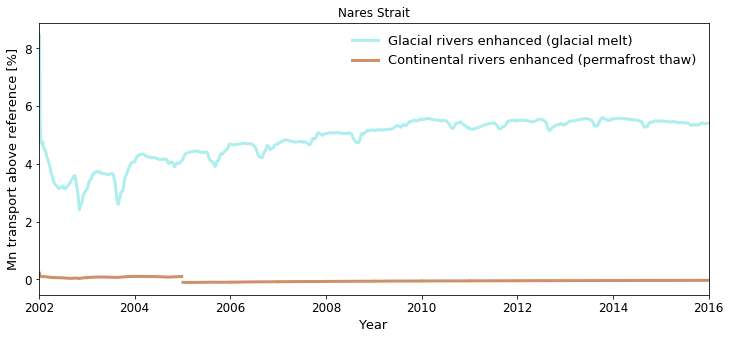

In [32]:
fig, ax = plt.subplots(1,1, figsize=(12,5))

ax.plot(dates_2002, np.divide(cumsum_Nares_riv_2002-cumsum_Nares_2002,-cumsum_Nares_2002)*100, linewidth=3, c=bdy_colours[3], \
       label='Glacial rivers enhanced (glacial melt)')
ax.plot(dates_2003, np.divide(cumsum_Nares_riv_2003-cumsum_Nares_2003,-cumsum_Nares_2003)*100, linewidth=3, c=bdy_colours[3])
ax.plot(dates_2004, np.divide(cumsum_Nares_riv_2004-cumsum_Nares_2004,-cumsum_Nares_2004)*100, linewidth=3, c=bdy_colours[3])
ax.plot(dates_2005, np.divide(cumsum_Nares_riv_2005-cumsum_Nares_2005,-cumsum_Nares_2005)*100, linewidth=3, c=bdy_colours[3])
ax.plot(dates_2006, np.divide(cumsum_Nares_riv_2006-cumsum_Nares_2006,-cumsum_Nares_2006)*100, linewidth=3, c=bdy_colours[3])
ax.plot(dates_2007, np.divide(cumsum_Nares_riv_2007-cumsum_Nares_2007,-cumsum_Nares_2007)*100, linewidth=3, c=bdy_colours[3])
ax.plot(dates_2008, np.divide(cumsum_Nares_riv_2008-cumsum_Nares_2008,-cumsum_Nares_2008)*100, linewidth=3, c=bdy_colours[3])
ax.plot(dates_2009, np.divide(cumsum_Nares_riv_2009-cumsum_Nares_2009,-cumsum_Nares_2009)*100, linewidth=3, c=bdy_colours[3])
ax.plot(dates_2010, np.divide(cumsum_Nares_riv_2010-cumsum_Nares_2010,-cumsum_Nares_2010)*100, linewidth=3, c=bdy_colours[3])
ax.plot(dates_2011, np.divide(cumsum_Nares_riv_2011-cumsum_Nares_2011,-cumsum_Nares_2011)*100, linewidth=3, c=bdy_colours[3])
ax.plot(dates_2012, np.divide(cumsum_Nares_riv_2012-cumsum_Nares_2012,-cumsum_Nares_2012)*100, linewidth=3, c=bdy_colours[3])
ax.plot(dates_2013, np.divide(cumsum_Nares_riv_2013-cumsum_Nares_2013,-cumsum_Nares_2013)*100, linewidth=3, c=bdy_colours[3])
ax.plot(dates_2014, np.divide(cumsum_Nares_riv_2014-cumsum_Nares_2014,-cumsum_Nares_2014)*100, linewidth=3, c=bdy_colours[3])
ax.plot(dates_2015, np.divide(cumsum_Nares_riv_2015-cumsum_Nares_2015,-cumsum_Nares_2015)*100, linewidth=3, c=bdy_colours[3])

ax.plot(dates_2002, np.divide(cumsum_Nares_con_2002-cumsum_Nares_2002,-cumsum_Nares_2002)*100, linewidth=3, c=bdy_colours[5], \
       label='Continental rivers enhanced (permafrost thaw)')
ax.plot(dates_2003, np.divide(cumsum_Nares_con_2003-cumsum_Nares_2003,-cumsum_Nares_2003)*100, linewidth=3, c=bdy_colours[5])
ax.plot(dates_2004, np.divide(cumsum_Nares_con_2004-cumsum_Nares_2004,-cumsum_Nares_2004)*100, linewidth=3, c=bdy_colours[5])
ax.plot(dates_2005, np.divide(cumsum_Nares_con_2005-cumsum_Nares_2005,cumsum_Nares_2005)*100, linewidth=3, c=bdy_colours[5])
ax.plot(dates_2006, np.divide(cumsum_Nares_con_2006-cumsum_Nares_2006,cumsum_Nares_2006)*100, linewidth=3, c=bdy_colours[5])
ax.plot(dates_2007, np.divide(cumsum_Nares_con_2007-cumsum_Nares_2007,cumsum_Nares_2007)*100, linewidth=3, c=bdy_colours[5])
ax.plot(dates_2008, np.divide(cumsum_Nares_con_2008-cumsum_Nares_2008,cumsum_Nares_2008)*100, linewidth=3, c=bdy_colours[5])
ax.plot(dates_2009, np.divide(cumsum_Nares_con_2009-cumsum_Nares_2009,cumsum_Nares_2009)*100, linewidth=3, c=bdy_colours[5])
ax.plot(dates_2010, np.divide(cumsum_Nares_con_2010-cumsum_Nares_2010,cumsum_Nares_2010)*100, linewidth=3, c=bdy_colours[5])
ax.plot(dates_2011, np.divide(cumsum_Nares_con_2011-cumsum_Nares_2011,cumsum_Nares_2011)*100, linewidth=3, c=bdy_colours[5])
ax.plot(dates_2012, np.divide(cumsum_Nares_con_2012-cumsum_Nares_2012,cumsum_Nares_2012)*100, linewidth=3, c=bdy_colours[5])
ax.plot(dates_2013, np.divide(cumsum_Nares_con_2013-cumsum_Nares_2013,cumsum_Nares_2013)*100, linewidth=3, c=bdy_colours[5])
ax.plot(dates_2014, np.divide(cumsum_Nares_con_2014-cumsum_Nares_2014,cumsum_Nares_2014)*100, linewidth=3, c=bdy_colours[5])
ax.plot(dates_2015, np.divide(cumsum_Nares_con_2015-cumsum_Nares_2015,cumsum_Nares_2015)*100, linewidth=3, c=bdy_colours[5])


ax.set_xlim([dt.datetime(2002,1,1), dt.datetime(2016,1,1)])
# ax.set_ylim([0,10])
ax.tick_params(axis='both', which='major', labelsize=12)

ax.set_xlabel('Year',fontsize=13)
ax.set_ylabel('Mn transport above reference [%]', fontsize=13)
ax.legend(fontsize=13, frameon=False)

ax.set_title('Nares Strait')

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/BB-sensitivity-time-series-20191001.png', bbox_inches='tight')

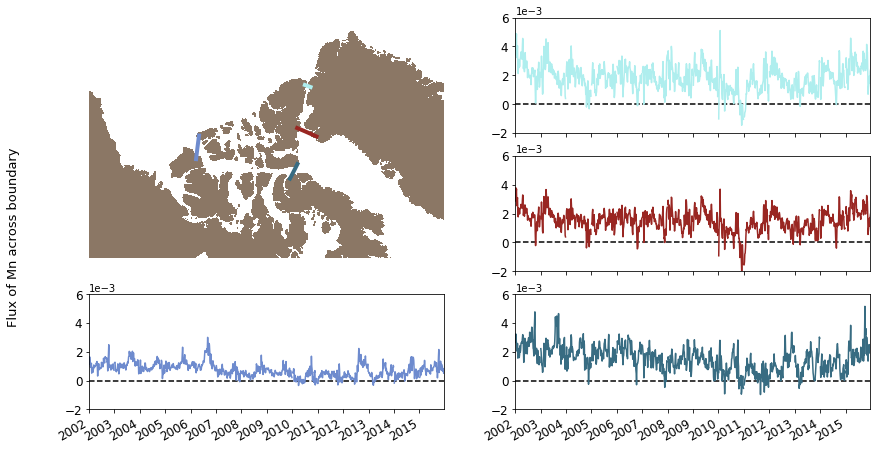

In [618]:
fig,ax = plt.subplots(3,2, figsize=(14,8))

fig.autofmt_xdate()

ax2 = plt.subplot2grid((3,2), (0,0), rowspan=2, colspan=1, frameon=False)

ax[0,1].get_xaxis().set_ticklabels([]);
ax[1,1].get_xaxis().set_ticklabels([]);

years = mdates.YearLocator()

for axs in [ax[2,0], ax[0,1], ax[1,1], ax[2,1]]:
    axs.set_xlim([dates_2002[0], dates_2015[-1]])
    axs.set_ylim([-2e-3, 6e-3])
    axs.plot([dates_2002[0], dates_2015[-1]], [0,0], '--k')
    axs.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    axs.tick_params(axis='both', which='major', labelsize=12)
    axs.xaxis.set_major_locator(years)

fig.text(0.05, 0.5, 'Flux of Mn across boundary',\
         ha='center', va='center', rotation='vertical', fontsize=13) #[mol/L 1/5day 1/area]

# plot map in top left ---------------------------------------------------------
proj1=Basemap(projection='eqdc',lat_0 = 77, lon_0 = -92, resolution='i', width=4.0e6, height=2.55e6, ax=ax2)
x_land, y_land = proj1(lons, lats)
proj1.contourf(x_land, y_land, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]))

x_model, y_model = proj1(tlons, tlats) 
proj1.plot(x_model[l2i, l2j[0]:l2j[-1]], y_model[l2i, l2j[0]:l2j[-1]],'-', c=bdy_colours[1], linewidth=4) 
proj1.plot(x_model[t1i[0]:t1i[-1], t1j], y_model[t1i[0]:t1i[-1], t1j],'-', c=bdy_colours[3], linewidth=4) 
proj1.plot(x_model[N1i[0]:N1i[-1],N1j], y_model[N1i[0]:N1i[-1],N1j], '-', c=bdy_colours[2], linewidth=4)
proj1.plot(x_model[P1i,P1j[0]:P1j[-1]], y_model[P1i,P1j[0]:P1j[-1]], '-', c=bdy_colours[0], linewidth=4)

# Into Parry Channel time series -- --------------------------------------------------------
ax[2,0].plot(dates_2002, np.sum(np.sum(-1*ts_2002_mn2,axis=2),axis=1), c=bdy_colours[1])
ax[2,0].plot(dates_2003, np.sum(np.sum(-1*ts_2003_mn2,axis=2),axis=1), c=bdy_colours[1])
ax[2,0].plot(dates_2004, np.sum(np.sum(-1*ts_2004_mn2,axis=2),axis=1), c=bdy_colours[1])
ax[2,0].plot(dates_2005, np.sum(np.sum(-1*ts_2005_mn2,axis=2),axis=1), c=bdy_colours[1])
ax[2,0].plot(dates_2006, np.sum(np.sum(-1*ts_2006_mn2,axis=2),axis=1), c=bdy_colours[1])
ax[2,0].plot(dates_2007, np.sum(np.sum(-1*ts_2007_mn2,axis=2),axis=1), c=bdy_colours[1])
ax[2,0].plot(dates_2008, np.sum(np.sum(-1*ts_2008_mn2,axis=2),axis=1), c=bdy_colours[1])
ax[2,0].plot(dates_2009, np.sum(np.sum(-1*ts_2009_mn2,axis=2),axis=1), c=bdy_colours[1])
ax[2,0].plot(dates_2010, np.sum(np.sum(-1*ts_2010_mn2,axis=2),axis=1), c=bdy_colours[1])
ax[2,0].plot(dates_2011, np.sum(np.sum(-1*ts_2011_mn2,axis=2),axis=1), c=bdy_colours[1])
ax[2,0].plot(dates_2012, np.sum(np.sum(-1*ts_2012_mn2,axis=2),axis=1), c=bdy_colours[1])
ax[2,0].plot(dates_2013, np.sum(np.sum(-1*ts_2013_mn2,axis=2),axis=1), c=bdy_colours[1])
ax[2,0].plot(dates_2014, np.sum(np.sum(-1*ts_2014_mn2,axis=2),axis=1), c=bdy_colours[1])
ax[2,0].plot(dates_2015, np.sum(np.sum(-1*ts_2015_mn2,axis=2),axis=1), c=bdy_colours[1])

# Into Nares Strait time series -- ---------------------------------------------------------
ax[0,1].plot(dates_2002, np.sum(np.sum(-1*ts_2002_mn7,axis=2),axis=1), c=bdy_colours[3])
ax[0,1].plot(dates_2003, np.sum(np.sum(-1*ts_2003_mn7,axis=2),axis=1), c=bdy_colours[3])
ax[0,1].plot(dates_2004, np.sum(np.sum(-1*ts_2004_mn7,axis=2),axis=1), c=bdy_colours[3])
ax[0,1].plot(dates_2005, np.sum(np.sum(-1*ts_2005_mn7,axis=2),axis=1), c=bdy_colours[3])
ax[0,1].plot(dates_2006, np.sum(np.sum(-1*ts_2006_mn7,axis=2),axis=1), c=bdy_colours[3])
ax[0,1].plot(dates_2007, np.sum(np.sum(-1*ts_2007_mn7,axis=2),axis=1), c=bdy_colours[3])
ax[0,1].plot(dates_2008, np.sum(np.sum(-1*ts_2008_mn7,axis=2),axis=1), c=bdy_colours[3])
ax[0,1].plot(dates_2009, np.sum(np.sum(-1*ts_2009_mn7,axis=2),axis=1), c=bdy_colours[3])
ax[0,1].plot(dates_2010, np.sum(np.sum(-1*ts_2010_mn7,axis=2),axis=1), c=bdy_colours[3])
ax[0,1].plot(dates_2011, np.sum(np.sum(-1*ts_2011_mn7,axis=2),axis=1), c=bdy_colours[3])
ax[0,1].plot(dates_2012, np.sum(np.sum(-1*ts_2012_mn7,axis=2),axis=1), c=bdy_colours[3])
ax[0,1].plot(dates_2013, np.sum(np.sum(-1*ts_2013_mn7,axis=2),axis=1), c=bdy_colours[3])
ax[0,1].plot(dates_2014, np.sum(np.sum(-1*ts_2014_mn7,axis=2),axis=1), c=bdy_colours[3])
ax[0,1].plot(dates_2015, np.sum(np.sum(-1*ts_2015_mn7,axis=2),axis=1), c=bdy_colours[3])

# Out of Nares Strait time series -- -------------------------------------------------------
ax[1,1].plot(dates_2002, np.sum(np.sum(-1*ts_2002_mn10,axis=2),axis=1), c=bdy_colours[2])
ax[1,1].plot(dates_2003, np.sum(np.sum(-1*ts_2003_mn10,axis=2),axis=1), c=bdy_colours[2])
ax[1,1].plot(dates_2004, np.sum(np.sum(-1*ts_2004_mn10,axis=2),axis=1), c=bdy_colours[2])
ax[1,1].plot(dates_2005, np.sum(np.sum(-1*ts_2005_mn10,axis=2),axis=1), c=bdy_colours[2])
ax[1,1].plot(dates_2006, np.sum(np.sum(-1*ts_2006_mn10,axis=2),axis=1), c=bdy_colours[2])
ax[1,1].plot(dates_2007, np.sum(np.sum(-1*ts_2007_mn10,axis=2),axis=1), c=bdy_colours[2])
ax[1,1].plot(dates_2008, np.sum(np.sum(-1*ts_2008_mn10,axis=2),axis=1), c=bdy_colours[2])
ax[1,1].plot(dates_2009, np.sum(np.sum(-1*ts_2009_mn10,axis=2),axis=1), c=bdy_colours[2])
ax[1,1].plot(dates_2010, np.sum(np.sum(-1*ts_2010_mn10,axis=2),axis=1), c=bdy_colours[2])
ax[1,1].plot(dates_2011, np.sum(np.sum(-1*ts_2011_mn10,axis=2),axis=1), c=bdy_colours[2])
ax[1,1].plot(dates_2012, np.sum(np.sum(-1*ts_2012_mn10,axis=2),axis=1), c=bdy_colours[2])
ax[1,1].plot(dates_2013, np.sum(np.sum(-1*ts_2013_mn10,axis=2),axis=1), c=bdy_colours[2])
ax[1,1].plot(dates_2014, np.sum(np.sum(-1*ts_2014_mn10,axis=2),axis=1), c=bdy_colours[2])
ax[1,1].plot(dates_2015, np.sum(np.sum(-1*ts_2015_mn10,axis=2),axis=1), c=bdy_colours[2])

# Out of Parry Channel time series -- ------------------------------------------------------
ax[2,1].plot(dates_2002, np.sum(np.sum(-1*ts_2002_mn11,axis=2),axis=1), c=bdy_colours[0])
ax[2,1].plot(dates_2003, np.sum(np.sum(-1*ts_2003_mn11,axis=2),axis=1), c=bdy_colours[0])
ax[2,1].plot(dates_2004, np.sum(np.sum(-1*ts_2004_mn11,axis=2),axis=1), c=bdy_colours[0])
ax[2,1].plot(dates_2005, np.sum(np.sum(-1*ts_2005_mn11,axis=2),axis=1), c=bdy_colours[0])
ax[2,1].plot(dates_2006, np.sum(np.sum(-1*ts_2006_mn11,axis=2),axis=1), c=bdy_colours[0])
ax[2,1].plot(dates_2007, np.sum(np.sum(-1*ts_2007_mn11,axis=2),axis=1), c=bdy_colours[0])
ax[2,1].plot(dates_2008, np.sum(np.sum(-1*ts_2008_mn11,axis=2),axis=1), c=bdy_colours[0])
ax[2,1].plot(dates_2009, np.sum(np.sum(-1*ts_2009_mn11,axis=2),axis=1), c=bdy_colours[0])
ax[2,1].plot(dates_2010, np.sum(np.sum(-1*ts_2010_mn11,axis=2),axis=1), c=bdy_colours[0])
ax[2,1].plot(dates_2011, np.sum(np.sum(-1*ts_2011_mn11,axis=2),axis=1), c=bdy_colours[0])
ax[2,1].plot(dates_2012, np.sum(np.sum(-1*ts_2012_mn11,axis=2),axis=1), c=bdy_colours[0])
ax[2,1].plot(dates_2013, np.sum(np.sum(-1*ts_2013_mn11,axis=2),axis=1), c=bdy_colours[0])
ax[2,1].plot(dates_2014, np.sum(np.sum(-1*ts_2014_mn11,axis=2),axis=1), c=bdy_colours[0])
ax[2,1].plot(dates_2015, np.sum(np.sum(-1*ts_2015_mn11,axis=2),axis=1), c=bdy_colours[0])

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/flux_time-series.png', bbox_inches='tight')

### Figure of combined transport change:

In [25]:
bdy_colours2 = ['#7ebca1','#bada55','#ffc125','#4d6995']
bdy_colours[3] = bdy_colours2[0]

In [26]:
import seaborn as sns; sns.set()
from matplotlib.ticker import FormatStrFormatter

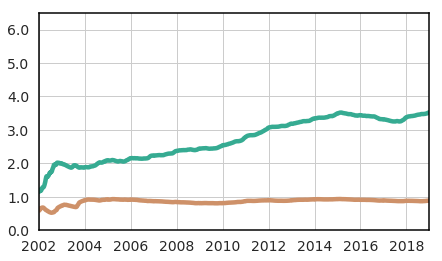

In [30]:
# Baffin Bay --------------------------------------------------------------------
# ax[1,1].text(0.09, 0.5, 'Baffin Bay')
bdy_colours[3] = '#36ab92'

fig = plt.figure(figsize=(7,4))

st = sns.axes_style("whitegrid")

with st:
    ax = sns.lineplot(dates_2002, np.divide(cumsum_riv2002-cumsum_2002,cumsum_2002)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2003, np.divide(cumsum_riv2003-cumsum_2003,cumsum_2003)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2004, np.divide(cumsum_riv2004-cumsum_2004,cumsum_2004)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2005, np.divide(cumsum_riv2005-cumsum_2005,cumsum_2005)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2006, np.divide(cumsum_riv2006-cumsum_2006,cumsum_2006)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2007, np.divide(cumsum_riv2007-cumsum_2007,cumsum_2007)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2008, np.divide(cumsum_riv2008-cumsum_2008,cumsum_2008)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2009, np.divide(cumsum_riv2009-cumsum_2009,cumsum_2009)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2010, np.divide(cumsum_riv2010-cumsum_2010,cumsum_2010)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2011, np.divide(cumsum_riv2011-cumsum_2011,cumsum_2011)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2012, np.divide(cumsum_riv2012-cumsum_2012,cumsum_2012)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2013, np.divide(cumsum_riv2013-cumsum_2013,cumsum_2013)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2014, np.divide(cumsum_riv2014-cumsum_2014,cumsum_2014)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2015, np.divide(cumsum_riv2015-cumsum_2015,cumsum_2015)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2016, np.divide(cumsum_riv2016-cumsum_2016,cumsum_2016)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2017, np.divide(cumsum_riv2017-cumsum_2017,cumsum_2017)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2018, np.divide(cumsum_riv2018-cumsum_2018,cumsum_2018)*100, linewidth=4.5, color=bdy_colours[3])

    sns.lineplot(dates_2002, np.divide(cumsum_con2002-cumsum_2002,cumsum_2002)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2003, np.divide(cumsum_con2003-cumsum_2003,cumsum_2003)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2004, np.divide(cumsum_con2004-cumsum_2004,cumsum_2004)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2005, np.divide(cumsum_con2005-cumsum_2005,cumsum_2005)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2006, np.divide(cumsum_con2006-cumsum_2006,cumsum_2006)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2007, np.divide(cumsum_con2007-cumsum_2007,cumsum_2007)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2008, np.divide(cumsum_con2008-cumsum_2008,cumsum_2008)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2009, np.divide(cumsum_con2009-cumsum_2009,cumsum_2009)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2010, np.divide(cumsum_con2010-cumsum_2010,cumsum_2010)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2011, np.divide(cumsum_con2011-cumsum_2011,cumsum_2011)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2012, np.divide(cumsum_con2012-cumsum_2012,cumsum_2012)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2013, np.divide(cumsum_con2013-cumsum_2013,cumsum_2013)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2014, np.divide(cumsum_con2014-cumsum_2014,cumsum_2014)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2015, np.divide(cumsum_con2015-cumsum_2015,cumsum_2015)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2016, np.divide(cumsum_con2016-cumsum_2016,cumsum_2016)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2017, np.divide(cumsum_con2017-cumsum_2017,cumsum_2017)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2018, np.divide(cumsum_con2018-cumsum_2018,cumsum_2018)*100, linewidth=4.5, color=bdy_colours[5])

    # sns.axes_style("whitegrid")
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    
    ax.set(ylim=(0, 6.5), xlim=(dt.datetime(2002,1,1), dt.datetime(2019,1,1)))
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.spines['left'].set_linewidth(1.5);   ax.spines['left'].set_color('black');
    ax.spines['bottom'].set_linewidth(1.5); ax.spines['bottom'].set_color('black');
    ax.spines['right'].set_linewidth(1.5);  ax.spines['right'].set_color('black');
    ax.spines['top'].set_linewidth(1.5);    ax.spines['top'].set_color('black');
    
# fig.savefig('/ocean/brogalla/GEOTRACES/figures/bdy-flux_time-series-BB2.png', bbox_inches='tight', dpi=300)

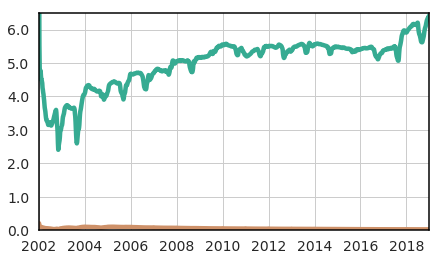

In [31]:
# Baffin Bay --------------------------------------------------------------------
# ax[1,1].text(0.09, 0.5, 'Baffin Bay')
bdy_colours[3] = '#36ab92'

fig = plt.figure(figsize=(7,4))

st = sns.axes_style("whitegrid")

with st:
    ax = sns.lineplot(dates_2002, np.divide(cumsum_Nares_riv_2002-cumsum_Nares_2002,-cumsum_Nares_2002)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2003, np.divide(cumsum_Nares_riv_2003-cumsum_Nares_2003,-cumsum_Nares_2003)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2004, np.divide(cumsum_Nares_riv_2004-cumsum_Nares_2004,-cumsum_Nares_2004)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2005, np.divide(cumsum_Nares_riv_2005-cumsum_Nares_2005,-cumsum_Nares_2005)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2006, np.divide(cumsum_Nares_riv_2006-cumsum_Nares_2006,-cumsum_Nares_2006)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2007, np.divide(cumsum_Nares_riv_2007-cumsum_Nares_2007,-cumsum_Nares_2007)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2008, np.divide(cumsum_Nares_riv_2008-cumsum_Nares_2008,-cumsum_Nares_2008)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2009, np.divide(cumsum_Nares_riv_2009-cumsum_Nares_2009,-cumsum_Nares_2009)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2010, np.divide(cumsum_Nares_riv_2010-cumsum_Nares_2010,-cumsum_Nares_2010)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2011, np.divide(cumsum_Nares_riv_2011-cumsum_Nares_2011,-cumsum_Nares_2011)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2012, np.divide(cumsum_Nares_riv_2012-cumsum_Nares_2012,-cumsum_Nares_2012)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2013, np.divide(cumsum_Nares_riv_2013-cumsum_Nares_2013,-cumsum_Nares_2013)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2014, np.divide(cumsum_Nares_riv_2014-cumsum_Nares_2014,-cumsum_Nares_2014)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2015, np.divide(cumsum_Nares_riv_2015-cumsum_Nares_2015,-cumsum_Nares_2015)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2016, np.divide(cumsum_Nares_riv_2016-cumsum_Nares_2016,-cumsum_Nares_2016)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2017, np.divide(cumsum_Nares_riv_2017-cumsum_Nares_2017,-cumsum_Nares_2017)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2018, np.divide(cumsum_Nares_riv_2018-cumsum_Nares_2018,-cumsum_Nares_2018)*100, linewidth=4.5, color=bdy_colours[3])

    sns.lineplot(dates_2002, np.divide(cumsum_Nares_con_2002-cumsum_Nares_2002,-cumsum_Nares_2002)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2003, np.divide(cumsum_Nares_con_2003-cumsum_Nares_2003,-cumsum_Nares_2003)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2004, np.divide(cumsum_Nares_con_2004-cumsum_Nares_2004,-cumsum_Nares_2004)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2005, np.divide(cumsum_Nares_con_2005-cumsum_Nares_2005,-cumsum_Nares_2005)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2006, np.divide(cumsum_Nares_con_2006-cumsum_Nares_2006,-cumsum_Nares_2006)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2007, np.divide(cumsum_Nares_con_2007-cumsum_Nares_2007,-cumsum_Nares_2007)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2008, np.divide(cumsum_Nares_con_2008-cumsum_Nares_2008,-cumsum_Nares_2008)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2009, np.divide(cumsum_Nares_con_2009-cumsum_Nares_2009,-cumsum_Nares_2009)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2010, np.divide(cumsum_Nares_con_2010-cumsum_Nares_2010,-cumsum_Nares_2010)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2011, np.divide(cumsum_Nares_con_2011-cumsum_Nares_2011,-cumsum_Nares_2011)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2012, np.divide(cumsum_Nares_con_2012-cumsum_Nares_2012,-cumsum_Nares_2012)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2013, np.divide(cumsum_Nares_con_2013-cumsum_Nares_2013,-cumsum_Nares_2013)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2014, np.divide(cumsum_Nares_con_2014-cumsum_Nares_2014,-cumsum_Nares_2014)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2015, np.divide(cumsum_Nares_con_2015-cumsum_Nares_2015,-cumsum_Nares_2015)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2016, np.divide(cumsum_Nares_con_2016-cumsum_Nares_2016,-cumsum_Nares_2016)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2017, np.divide(cumsum_Nares_con_2017-cumsum_Nares_2017,-cumsum_Nares_2017)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2018, np.divide(cumsum_Nares_con_2018-cumsum_Nares_2018,-cumsum_Nares_2018)*100, linewidth=4.5, color=bdy_colours[5])

    # sns.axes_style("whitegrid")
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    
    ax.set(ylim=(0, 6.5), xlim=(dt.datetime(2002,1,1), dt.datetime(2019,1,1)))
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.spines['left'].set_linewidth(1.5);   ax.spines['left'].set_color('black');
    ax.spines['bottom'].set_linewidth(1.5); ax.spines['bottom'].set_color('black');
    ax.spines['right'].set_linewidth(1.5);  ax.spines['right'].set_color('black');
    ax.spines['top'].set_linewidth(1.5);    ax.spines['top'].set_color('black');
    
fig.savefig('/ocean/brogalla/GEOTRACES/figures/bdy-flux_time-series-Nares2.png', bbox_inches='tight', dpi=300)

cumsum_Nares is normal, cumsum_Nares_con is not normal.

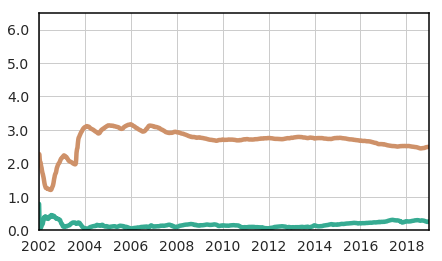

In [32]:
# Baffin Bay --------------------------------------------------------------------
# ax[1,1].text(0.09, 0.5, 'Baffin Bay')
bdy_colours[3] = '#36ab92'

fig = plt.figure(figsize=(7,4))

st = sns.axes_style("whitegrid")

with st:
    ax = sns.lineplot(dates_2002, np.divide(cumsum_Parry_riv_2002-cumsum_Parry_2002,cumsum_Parry_2002)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2003, np.divide(cumsum_Parry_riv_2003-cumsum_Parry_2003,cumsum_Parry_2003)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2004, np.divide(cumsum_Parry_riv_2004-cumsum_Parry_2004,cumsum_Parry_2004)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2005, np.divide(cumsum_Parry_riv_2005-cumsum_Parry_2005,cumsum_Parry_2005)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2006, np.divide(cumsum_Parry_riv_2006-cumsum_Parry_2006,cumsum_Parry_2006)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2007, np.divide(cumsum_Parry_riv_2007-cumsum_Parry_2007,cumsum_Parry_2007)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2008, np.divide(cumsum_Parry_riv_2008-cumsum_Parry_2008,cumsum_Parry_2008)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2009, np.divide(cumsum_Parry_riv_2009-cumsum_Parry_2009,cumsum_Parry_2009)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2010, np.divide(cumsum_Parry_riv_2010-cumsum_Parry_2010,cumsum_Parry_2010)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2011, np.divide(cumsum_Parry_riv_2011-cumsum_Parry_2011,cumsum_Parry_2011)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2012, np.divide(cumsum_Parry_riv_2012-cumsum_Parry_2012,cumsum_Parry_2012)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2013, np.divide(cumsum_Parry_riv_2013-cumsum_Parry_2013,cumsum_Parry_2013)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2014, np.divide(cumsum_Parry_riv_2014-cumsum_Parry_2014,cumsum_Parry_2014)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2015, np.divide(cumsum_Parry_riv_2015-cumsum_Parry_2015,cumsum_Parry_2015)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2016, np.divide(cumsum_Parry_riv_2016-cumsum_Parry_2016,cumsum_Parry_2016)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2017, np.divide(cumsum_Parry_riv_2017-cumsum_Parry_2017,cumsum_Parry_2017)*100, linewidth=4.5, color=bdy_colours[3])
    sns.lineplot(dates_2018, np.divide(cumsum_Parry_riv_2018-cumsum_Parry_2018,cumsum_Parry_2018)*100, linewidth=4.5, color=bdy_colours[3])

    sns.lineplot(dates_2002, np.divide(cumsum_Parry_con_2002-cumsum_Parry_2002,cumsum_Parry_2002)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2003, np.divide(cumsum_Parry_con_2003-cumsum_Parry_2003,cumsum_Parry_2003)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2004, np.divide(cumsum_Parry_con_2004-cumsum_Parry_2004,cumsum_Parry_2004)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2005, np.divide(cumsum_Parry_con_2005-cumsum_Parry_2005,cumsum_Parry_2005)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2006, np.divide(cumsum_Parry_con_2006-cumsum_Parry_2006,cumsum_Parry_2006)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2007, np.divide(cumsum_Parry_con_2007-cumsum_Parry_2007,cumsum_Parry_2007)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2008, np.divide(cumsum_Parry_con_2008-cumsum_Parry_2008,cumsum_Parry_2008)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2009, np.divide(cumsum_Parry_con_2009-cumsum_Parry_2009,cumsum_Parry_2009)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2010, np.divide(cumsum_Parry_con_2010-cumsum_Parry_2010,cumsum_Parry_2010)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2011, np.divide(cumsum_Parry_con_2011-cumsum_Parry_2011,cumsum_Parry_2011)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2012, np.divide(cumsum_Parry_con_2012-cumsum_Parry_2012,cumsum_Parry_2012)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2013, np.divide(cumsum_Parry_con_2013-cumsum_Parry_2013,cumsum_Parry_2013)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2014, np.divide(cumsum_Parry_con_2014-cumsum_Parry_2014,cumsum_Parry_2014)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2015, np.divide(cumsum_Parry_con_2015-cumsum_Parry_2015,cumsum_Parry_2015)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2016, np.divide(cumsum_Parry_con_2016-cumsum_Parry_2016,cumsum_Parry_2016)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2017, np.divide(cumsum_Parry_con_2017-cumsum_Parry_2017,cumsum_Parry_2017)*100, linewidth=4.5, color=bdy_colours[5])
    sns.lineplot(dates_2018, np.divide(cumsum_Parry_con_2018-cumsum_Parry_2018,cumsum_Parry_2018)*100, linewidth=4.5, color=bdy_colours[5])

    # sns.axes_style("whitegrid")
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    
    ax.set(ylim=(0, 6.5), xlim=(dt.datetime(2002,1,1), dt.datetime(2019,1,1)))
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.spines['left'].set_linewidth(1.5);   ax.spines['left'].set_color('black');
    ax.spines['bottom'].set_linewidth(1.5); ax.spines['bottom'].set_color('black');
    ax.spines['right'].set_linewidth(1.5);  ax.spines['right'].set_color('black');
    ax.spines['top'].set_linewidth(1.5);    ax.spines['top'].set_color('black');
    
fig.savefig('/ocean/brogalla/GEOTRACES/figures/bdy-flux_time-series-Parry2.png', bbox_inches='tight', dpi=300)

Separated by layer: (year, 5day within year)

In [32]:
def flux_layer(top, bottom):
    in_BB  = np.empty((14, 72))
    out_BB = np.empty((14, 72))

    count = 0
    for year in range(2002, 2016):
        ts_year_mn1, ts_year_mn2, ts_year_mn_WCAA, ts_year_mn7, ts_year_mn8, \
        ts_year_mn9, ts_year_mn10, ts_year_mn11 = time_series_pickle(year)

        for date in range(0,72):
            in_BB[count,date]  = np.sum(ts_year_mn8[date, top:bottom, :][ts_year_mn8[date, top:bottom, :] >= 0])
            out_BB[count,date] = np.sum(ts_year_mn8[date, top:bottom, :][ts_year_mn8[date, top:bottom, :] < 0])

        count+=1
        
    return in_BB, out_BB

In [33]:
dates = dates_2002+dates_2003+dates_2004+dates_2005+dates_2006+dates_2007+dates_2008+dates_2009+dates_2010+\
        dates_2011+dates_2012+dates_2013+dates_2014+dates_2015+dates_2016+dates_2017+dates_2018

In [553]:
in_BB_surf, out_BB_surf   = flux_layer(0, 18)
in_BB_intm1, out_BB_intm1 = flux_layer(18, 27)
in_BB_intm2, out_BB_intm2 = flux_layer(27, 34)
in_BB_deep, out_BB_deep   = flux_layer(34, 50)
in_BB_total, out_BB_total = flux_layer(0, 50)

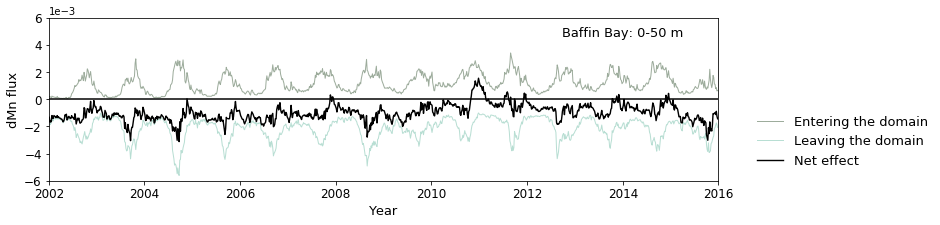

In [554]:
fig, ax = plt.subplots(1,1, figsize=(12,3))

ax.plot(dates, in_BB_surf.flatten(),  c='#9dac9c', linewidth=1.0, label='Entering the domain')
ax.plot(dates, out_BB_surf.flatten(), c='#b8ded3', linewidth=1.0, label='Leaving the domain')
ax.plot(dates, out_BB_surf.flatten()+in_BB_surf.flatten(), c='k', linewidth=1.4, label='Net effect')
ax.plot([dates_2002[0], dates_2015[-1]], [0, 0], '-k')

ax.set_xlim([dt.datetime(2002,1,1), dt.datetime(2016,1,1)])
ax.set_ylim([-6e-3, 6e-3])
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel('Year',fontsize=13)
ax.set_ylabel('dMn flux', fontsize=13)
ax.text(dates_2012[-20], 4.6e-3, 'Baffin Bay: 0-50 m', fontsize=13)

ax.legend(loc=(1.05, 0.05), frameon=False, fontsize=13)
# fig.savefig('/ocean/brogalla/GEOTRACES/figures/BB-time-series-20190925-surface.png', bbox_inches='tight')

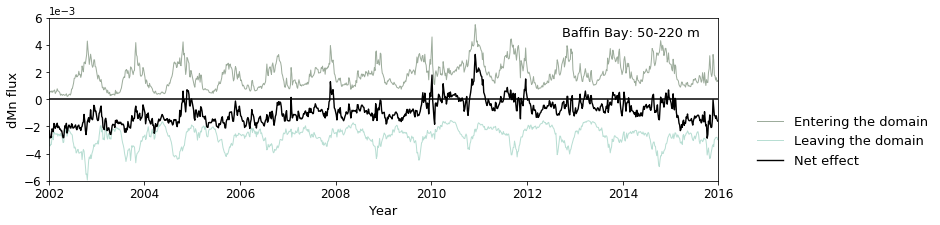

In [555]:
fig, ax = plt.subplots(1,1, figsize=(12,3))

ax.plot(dates, in_BB_intm1.flatten(),  c='#9dac9c', linewidth=1.0, label='Entering the domain')
ax.plot(dates, out_BB_intm1.flatten(), c='#b8ded3', linewidth=1.0, label='Leaving the domain')
ax.plot(dates, out_BB_intm1.flatten()+in_BB_intm1.flatten(), c='k', linewidth=1.4, label='Net effect')
ax.plot([dates_2002[0], dates_2015[-1]], [0, 0], '-k')

ax.set_xlim([dt.datetime(2002,1,1), dt.datetime(2016,1,1)])
ax.set_ylim([-6e-3, 6e-3])
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel('Year',fontsize=13)
ax.set_ylabel('dMn flux', fontsize=13)
ax.text(dates_2012[-20], 4.6e-3, 'Baffin Bay: 50-220 m', fontsize=13)

ax.legend(loc=(1.05, 0.05), frameon=False, fontsize=13)
# fig.savefig('/ocean/brogalla/GEOTRACES/figures/BB-time-series-20190925-intm1.png', bbox_inches='tight')

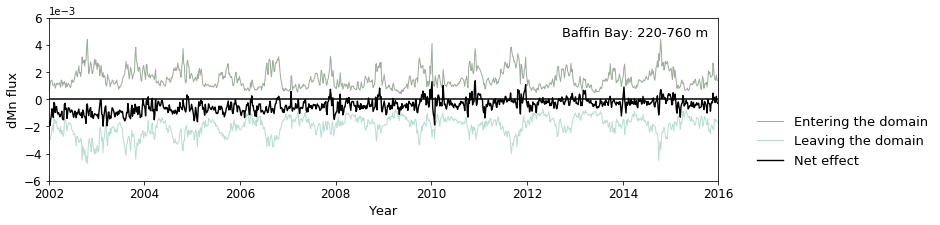

In [556]:
fig, ax = plt.subplots(1,1, figsize=(12,3))

ax.plot(dates, in_BB_intm2.flatten(),  c='#9dac9c', linewidth=1.0, label='Entering the domain')
ax.plot(dates, out_BB_intm2.flatten(), c='#b8ded3', linewidth=1.0, label='Leaving the domain')
ax.plot(dates, out_BB_intm2.flatten()+in_BB_intm2.flatten(), c='k', linewidth=1.4, label='Net effect')
ax.plot([dates_2002[0], dates_2015[-1]], [0, 0], '-k')

ax.set_xlim([dt.datetime(2002,1,1), dt.datetime(2016,1,1)])
ax.set_ylim([-6e-3, 6e-3])
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel('Year',fontsize=13)
ax.set_ylabel('dMn flux', fontsize=13)
ax.text(dates_2012[-20], 4.6e-3, 'Baffin Bay: 220-760 m', fontsize=13)
# ax.set_title('intm2 Baffin Bay')

ax.legend(loc=(1.05, 0.05), frameon=False, fontsize=13)
# fig.savefig('/ocean/brogalla/GEOTRACES/figures/BB-time-series-20190925-intm2.png', bbox_inches='tight')

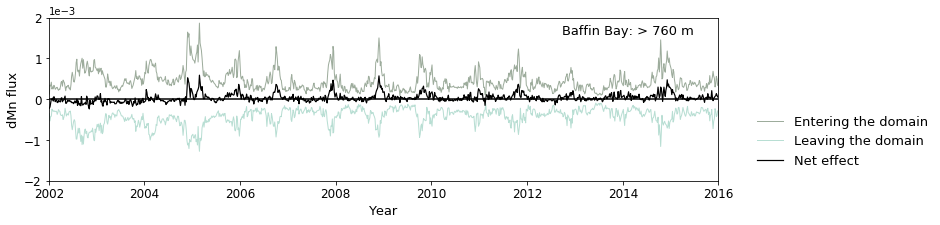

In [557]:
fig, ax = plt.subplots(1,1, figsize=(12,3))

ax.plot(dates, in_BB_deep.flatten(),  c='#9dac9c', linewidth=1.0, label='Entering the domain')
ax.plot(dates, out_BB_deep.flatten(), c='#b8ded3', linewidth=1.0, label='Leaving the domain')
ax.plot(dates, out_BB_deep.flatten()+in_BB_deep.flatten(), c='k', linewidth=1.2, label='Net effect')
ax.plot([dates_2002[0], dates_2015[-1]], [0, 0], '-k')

ax.set_xlim([dt.datetime(2002,1,1), dt.datetime(2016,1,1)])
ax.set_ylim([-2e-3, 2e-3])
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel('Year',fontsize=13)
ax.set_ylabel('dMn flux', fontsize=13)
ax.text(dates_2012[-20], 1.6e-3, 'Baffin Bay: > 760 m', fontsize=13)
ax.legend(loc=(1.05, 0.05), frameon=False, fontsize=13)
# ax.set_title('Deep Baffin Bay')
# fig.savefig('/ocean/brogalla/GEOTRACES/figures/BB-time-series-20190925-deep.png', bbox_inches='tight')

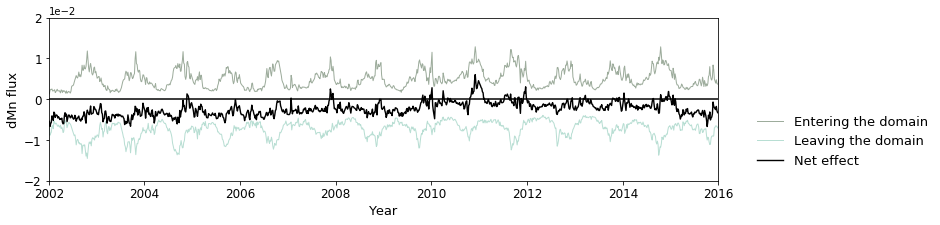

In [558]:
fig, ax = plt.subplots(1,1, figsize=(12,3))

ax.plot(dates, in_BB_total.flatten(),  c='#9dac9c', linewidth=1.0, label='Entering the domain')
ax.plot(dates, out_BB_total.flatten(), c='#b8ded3', linewidth=1.0, label='Leaving the domain')
ax.plot(dates, out_BB_total.flatten()+in_BB_total.flatten(), c='k', linewidth=1.4, label='Net effect')
ax.plot([dates_2002[0], dates_2015[-1]], [0, 0], '-k')

ax.set_xlim([dt.datetime(2002,1,1), dt.datetime(2016,1,1)])
ax.set_ylim([-2e-2, 2e-2])
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel('Year',fontsize=13)
ax.set_ylabel('dMn flux', fontsize=13)
ax.legend(loc=(1.05, 0.05), frameon=False, fontsize=13)
# fig.savefig('/ocean/brogalla/GEOTRACES/figures/BB-time-series-20190925-all.png', bbox_inches='tight')

Look at where the positive and negative fluxes are coming from within Baffin Bay (as expected?). Can do based on histogram with sum of positive and negative number of occurrences at each grid point.

In [559]:
lon_BB = tlons[r1i, r1j[0]:r1j[-1]]
lat_BB = tlats[r1i, r1j[0]:r1j[-1]]

In [560]:
def count_occurrences(top, bottom):
    
    count_into_BB = np.zeros((15,167))
    count_out_BB  = np.zeros((15,167))
    
    yr=0
    for year in range(2002, 2016):
        ts_year_mn1, ts_year_mn2, ts_year_mn_WCAA, ts_year_mn7, ts_year_mn8, ts_year_mn9, \
        ts_year_mn10, ts_year_mn11 = time_series_pickle(year)
       
        pos = np.zeros_like(ts_year_mn8)
        neg = np.zeros_like(ts_year_mn8)
        pos[ts_year_mn8 > 0] = 1
        neg[ts_year_mn8 < 0] = 1
        
        count_into_BB[yr,:] = np.sum(pos[:,top:bottom,:], axis=(0,1))
        count_out_BB[yr,:]  = np.sum(neg[:,top:bottom,:], axis=(0,1))
        
        yr+=1
        
    ct_in_BB  = np.sum(count_into_BB, axis=0)
    ct_out_BB = np.sum(count_out_BB, axis=0)
    
    return ct_in_BB, ct_out_BB

In [561]:
ct_in_BB_surf, ct_out_BB_surf   = count_occurrences(0, 18)
ct_in_BB_intm1, ct_out_BB_intm1 = count_occurrences(18, 27)
ct_in_BB_intm2, ct_out_BB_intm2 = count_occurrences(27, 30)
ct_in_BB_deep1, ct_out_BB_deep1 = count_occurrences(30, 40)
ct_in_BB_deep2, ct_out_BB_deep2 = count_occurrences(40, 45)
ct_in_BB_all,  ct_out_BB_all    = count_occurrences(0, 50)

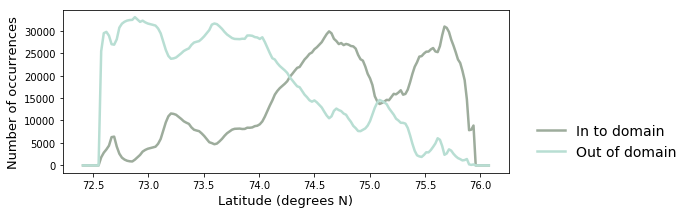

In [562]:
fig, ax = plt.subplots(1,1, figsize=(8,3))

ax.plot(lat_BB, ct_in_BB_all, linewidth=2.5,  c='#9dac9c', label='In to domain' )
ax.plot(lat_BB, ct_out_BB_all, linewidth=2.5, c='#b8ded3', label='Out of domain')
ax.set_xlabel('Latitude (degrees N)', fontsize=13)
ax.set_ylabel('Number of occurrences', fontsize=13)
ax.legend(loc=(1.05, 0.05), frameon=False, fontsize=14)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/BB-transect-20190925-all.png', bbox_inches='tight')

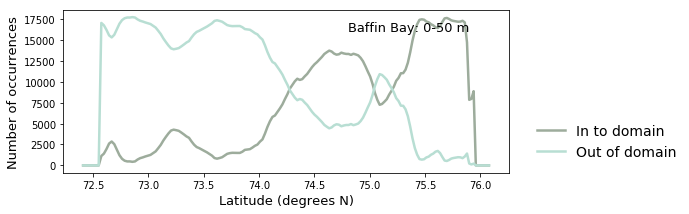

In [563]:
fig, ax = plt.subplots(1,1, figsize=(8,3))

ax.plot(lat_BB, ct_in_BB_surf, linewidth=2.5,  c='#9dac9c', label='In to domain' )
ax.plot(lat_BB, ct_out_BB_surf, linewidth=2.5, c='#b8ded3', label='Out of domain')

ax.set_xlabel('Latitude (degrees N)', fontsize=13)
ax.set_ylabel('Number of occurrences', fontsize=13)
ax.text(74.8, 16e3, 'Baffin Bay: 0-50 m', fontsize=13)
ax.legend(loc=(1.05, 0.05), frameon=False, fontsize=14)
# fig.savefig('/ocean/brogalla/GEOTRACES/figures/BB-transect-20190925-surf.png', bbox_inches='tight')

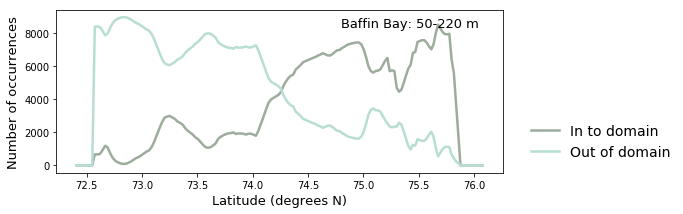

In [564]:
fig, ax = plt.subplots(1,1, figsize=(8,3))

ax.plot(lat_BB, ct_in_BB_intm1, linewidth=2.5,  c='#9dac9c', label='In to domain' )
ax.plot(lat_BB, ct_out_BB_intm1, linewidth=2.5, c='#b8ded3', label='Out of domain')

ax.set_xlabel('Latitude (degrees N)', fontsize=13)
ax.set_ylabel('Number of occurrences', fontsize=13)
ax.text(74.8, 8400, 'Baffin Bay: 50-220 m', fontsize=13)
ax.legend(loc=(1.05, 0.05), frameon=False, fontsize=14)
# fig.savefig('/ocean/brogalla/GEOTRACES/figures/BB-transect-20190925-intm1.png', bbox_inches='tight')

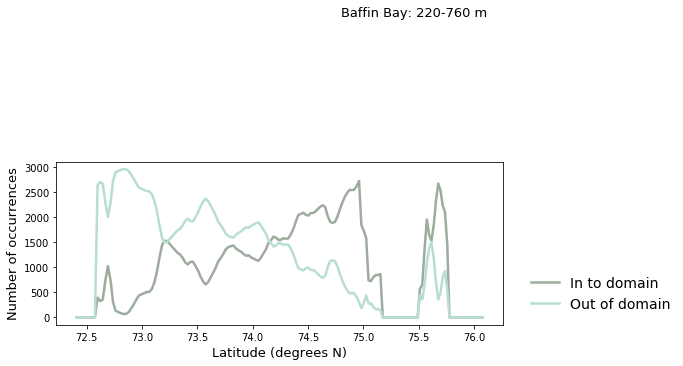

In [565]:
fig, ax = plt.subplots(1,1, figsize=(8,3))

ax.plot(lat_BB, ct_in_BB_intm2, linewidth=2.5,  c='#9dac9c', label='In to domain' )
ax.plot(lat_BB, ct_out_BB_intm2, linewidth=2.5, c='#b8ded3', label='Out of domain')

ax.set_xlabel('Latitude (degrees N)', fontsize=13)
ax.set_ylabel('Number of occurrences', fontsize=13)
ax.text(74.8, 6000, 'Baffin Bay: 220-760 m', fontsize=13)
ax.legend(loc=(1.05, 0.05), frameon=False, fontsize=14)
# fig.savefig('/ocean/brogalla/GEOTRACES/figures/BB-transect-20190925-intm2.png', bbox_inches='tight')

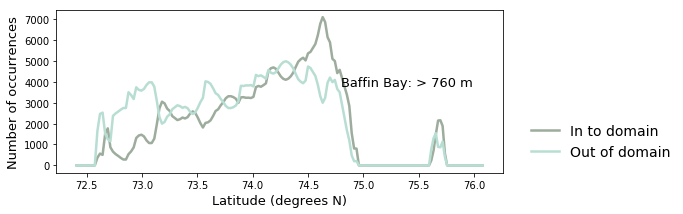

In [566]:
fig, ax = plt.subplots(1,1, figsize=(8,3))

ax.plot(lat_BB, ct_in_BB_deep1, linewidth=2.5,  c='#9dac9c', label='In to domain' )
ax.plot(lat_BB, ct_out_BB_deep1, linewidth=2.5, c='#b8ded3', label='Out of domain')

ax.set_xlabel('Latitude (degrees N)', fontsize=13)
ax.set_ylabel('Number of occurrences', fontsize=13)
ax.text(74.8, 3800, 'Baffin Bay: > 760 m', fontsize=13)
ax.legend(loc=(1.05, 0.05), frameon=False, fontsize=14)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/BB-transect-20190925-deep.png', bbox_inches='tight')

Text(0, 0.5, 'Number of occurrences')

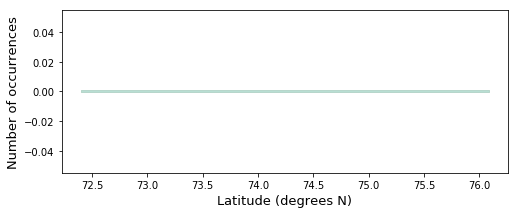

In [567]:
fig, ax = plt.subplots(1,1, figsize=(8,3))

ax.plot(lat_BB, ct_in_BB_deep2, linewidth=2.5,  c='#9dac9c', label='In to domain' )
ax.plot(lat_BB, ct_out_BB_deep2, linewidth=2.5, c='#b8ded3', label='Out of domain')

ax.set_xlabel('Latitude (degrees N)', fontsize=13)
ax.set_ylabel('Number of occurrences', fontsize=13)
# ax.text(74.8, 3800, 'Baffin Bay: > 760 m', fontsize=13)
# ax.legend(loc=(1.05, 0.05), frameon=False, fontsize=14)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/BB-transect-20190925-deep.png', bbox_inches='tight')

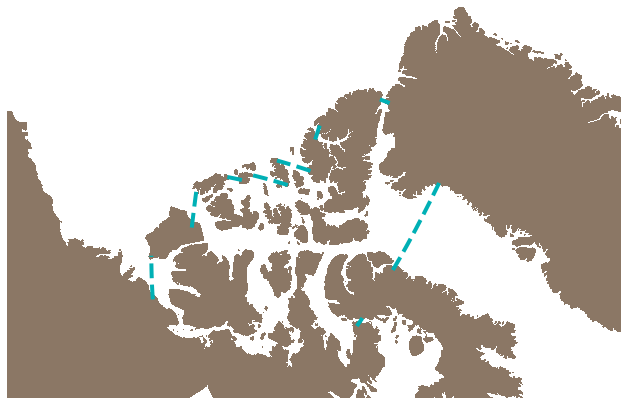

In [355]:
fig,ax = plt.subplots(1,1, figsize=(11,8))

proj1=Basemap(projection='eqdc',lat_0 = 77, lon_0 = -92, resolution='i', width=4.0e6, height=2.55e6, ax=ax)
x_land, y_land = proj1(lons, lats)
proj1.contourf(x_land, y_land, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]))

x_model, y_model = proj1(tlons, tlats)
proj1.plot(x_model[l1i, l1j[0]:l1j[-1]], y_model[l1i, l1j[0]:l1j[-1]],'--', c='#00b0b5', linewidth=4) 
proj1.plot(x_model[l2i, l2j[0]:l2j[-1]], y_model[l2i, l2j[0]:l2j[-1]],'--', c='#00b0b5', linewidth=4) 
proj1.plot(x_model[l3i[0]:l3i[-1], l3j], y_model[l3i[0]:l3i[-1], l3j],'--', c='#00b0b5', linewidth=4) 
proj1.plot(x_model[l4i[0]:l4i[-1], l4j], y_model[l4i[0]:l4i[-1], l4j],'--', c='#00b0b5', linewidth=4)
proj1.plot(x_model[l5i[0]:l5i[-1], l5j], y_model[l5i[0]:l5i[-1], l5j],'--', c='#00b0b5', linewidth=4)
proj1.plot(x_model[l6i, l6j[0]:l6j[-1]], y_model[l6i, l6j[0]:l6j[-1]],'--', c='#00b0b5', linewidth=4)
proj1.plot(x_model[t1i[0]:t1i[-1], t1j], y_model[t1i[0]:t1i[-1], t1j],'--', c='#00b0b5', linewidth=4) 
proj1.plot(x_model[r1i, r1j[0]:r1j[-1]], y_model[r1i, r1j[0]:r1j[-1]],'--', c='#00b0b5', linewidth=4) 
proj1.plot(x_model[r2i, r2j[0]:r2j[-1]], y_model[r2i, r2j[0]:r2j[-1]],'--', c='#00b0b5', linewidth=4) 

ax.axis('off')

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/flux-boundaries-map.png', bbox_inches='tight')

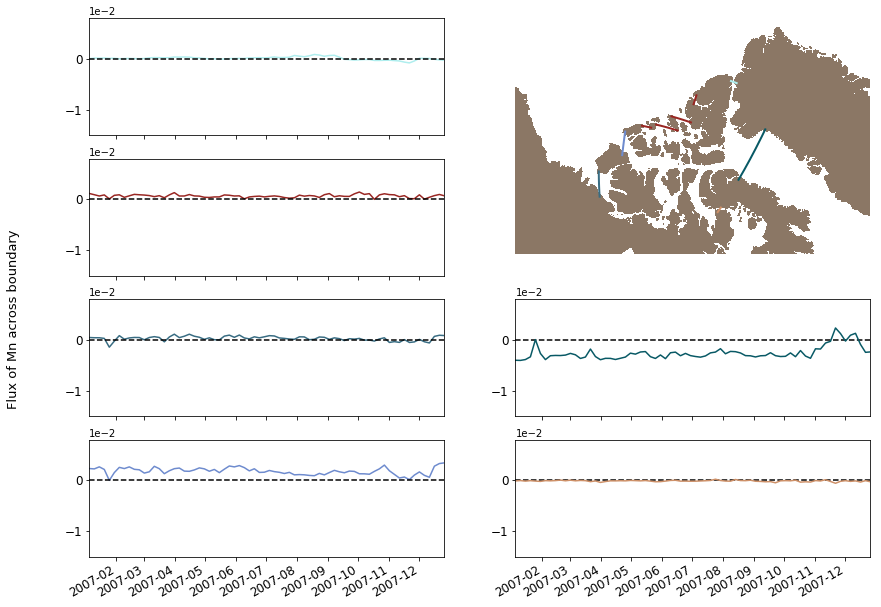

In [320]:
fig,ax = plt.subplots(4,2, figsize=(14,11))

fig.autofmt_xdate()

ax2 = plt.subplot2grid((2,2), (0,1), rowspan=1, colspan=2, frameon=False)

ax[0,1].set_visible(False)
ax[1,1].set_visible(False)

ax[0,0].get_xaxis().set_ticklabels([]);
ax[1,0].get_xaxis().set_ticklabels([]);
ax[2,0].get_xaxis().set_ticklabels([]);
ax[2,1].get_xaxis().set_ticklabels([]);

fig.text(0.05, 0.5, 'Flux of Mn across boundary',\
         ha='center', va='center', rotation='vertical', fontsize=13) #[mol/L 1/5day 1/area]

# Left 4 time series -- ---------------------------------------------------------
ax[0,0].plot(dates_2007, -1*np.sum(np.sum(ts_2007_mn1,axis=2),axis=1), c=bdy_colours[3])
ax[1,0].plot(dates_2007, -1*np.sum(np.sum(ts_2007_mn2,axis=2),axis=1), c=bdy_colours[2])
ax[2,0].plot(dates_2007, -1*ts_2007_mn_WCAA, c=bdy_colours[0])
ax[3,0].plot(dates_2007, -1*np.sum(np.sum(ts_2007_mn7,axis=2),axis=1), c=bdy_colours[1])

for axs in [ax[0,0], ax[1,0], ax[2,0], ax[3,0], ax[2,1], ax[3,1]]:
    axs.plot([dates_2007[0], dates_2007[-1]], [0, 0], '--k')
    axs.set_xlim([dates_2007[0], dates_2007[-1]])
    axs.set_ylim([-1.5e-2, 8e-3])
    axs.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    axs.tick_params(axis='both', which='major', labelsize=12)

# Right 2 time series -- ---------------------------------------------------------
ax[2,1].plot(dates_2007, np.sum(np.sum(ts_2007_mn8,axis=2),axis=1), c=bdy_colours[4])
ax[3,1].plot(dates_2007, np.sum(np.sum(ts_2007_mn9,axis=2),axis=1), c=bdy_colours[5])


# plot map in top right ---------------------------------------------------------
proj1=Basemap(projection='eqdc',lat_0 = 77, lon_0 = -92, resolution='i', width=4.0e6, height=2.55e6, ax=ax2)
x_land, y_land = proj1(lons, lats)
proj1.contourf(x_land, y_land, land_mask[0,:,:], vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]))

x_model, y_model = proj1(tlons, tlats)
proj1.plot(x_model[l1i, l1j[0]:l1j[-1]], y_model[l1i, l1j[0]:l1j[-1]],'-', c=bdy_colours[0], linewidth=2) 
proj1.plot(x_model[l2i, l2j[0]:l2j[-1]], y_model[l2i, l2j[0]:l2j[-1]],'-', c=bdy_colours[1], linewidth=2) 
proj1.plot(x_model[l3i[0]:l3i[-1], l3j], y_model[l3i[0]:l3i[-1], l3j],'-', c=bdy_colours[2], linewidth=2) 
proj1.plot(x_model[l4i[0]:l4i[-1], l4j], y_model[l4i[0]:l4i[-1], l4j],'-', c=bdy_colours[2], linewidth=2)
proj1.plot(x_model[l5i[0]:l5i[-1], l5j], y_model[l5i[0]:l5i[-1], l5j],'-', c=bdy_colours[2], linewidth=2)
proj1.plot(x_model[l6i, l6j[0]:l6j[-1]], y_model[l6i, l6j[0]:l6j[-1]],'-', c=bdy_colours[2], linewidth=2)
proj1.plot(x_model[t1i[0]:t1i[-1], t1j], y_model[t1i[0]:t1i[-1], t1j],'-', c=bdy_colours[3], linewidth=2) 
proj1.plot(x_model[r1i, r1j[0]:r1j[-1]], y_model[r1i, r1j[0]:r1j[-1]],'-', c=bdy_colours[4], linewidth=2) 
proj1.plot(x_model[r2i, r2j[0]:r2j[-1]], y_model[r2i, r2j[0]:r2j[-1]],'-', c=bdy_colours[5], linewidth=2) 

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/flux_time-series.png', bbox_inches='tight')